# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [50]:
# Import warnings
import warnings as wrn
wrn.simplefilter("ignore")

In [51]:
# Import the libraries you will be using for analysis
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure matplotlib and pandas
%matplotlib inline
pd.options.display.max_columns = 30


In [52]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [53]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
df = pd.read_parquet(r'Z:\NYC TAXI 2023 EDA\py assign 1 Starter-Notebook-EDA-NYC-Taxi\Datasets and Dictionary-NYC (1)\Datasets and Dictionary\trip_records\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [54]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [55]:
# from google.colab import drive
# drive.mount('/content/drive')

In [56]:
# Loop through monthly trip data files and sample 5% entries from each hour of each day
import os
import pandas as pd

os.chdir(r'Z:\NYC TAXI 2023 EDA\py assign 1 Starter-Notebook-EDA-NYC-Taxi\Datasets and Dictionary-NYC (1)\Datasets and Dictionary\trip_records')
file_list = os.listdir()

df = pd.DataFrame()

for file_name in file_list:
    try:
        file_path = os.path.join(os.getcwd(), file_name)
        monthly_data = pd.read_parquet(file_path)

        # Ensure datetime format
        monthly_data['pickup_datetime_temp'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])
        monthly_data['pickup_date_only'] = monthly_data['pickup_datetime_temp'].dt.date

        temp_month_df = pd.DataFrame()

        for date in monthly_data['pickup_date_only'].unique():
            day_data = monthly_data[monthly_data['pickup_date_only'] == date]

            for hour in range(24):
                hour_data = day_data[day_data['pickup_datetime_temp'].dt.hour == hour]

                if not hour_data.empty:
                    sampled = hour_data.sample(frac=0.05, random_state=42)
                    temp_month_df = pd.concat([temp_month_df, sampled], ignore_index=True)

        df = pd.concat([df, temp_month_df], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [57]:
# Store the df in csv/parquet
# df.to_parquet('')
# Save the sampled dataset only if it hasn't been saved before
from pathlib import Path

data_dir = Path("trip_records")
data_dir.mkdir(exist_ok=True)  # Ensure the directory exists
output_file = data_dir / "sampled_data.parquet"

if not output_file.exists():
    # Use the combined and sampled DataFrame 'df' from previous cells
    sampled_data = df
    sampled_data.to_parquet(output_file, engine="pyarrow")


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [58]:
# Load the new data file
# Load the previously saved sampled dataset for further processing
from pathlib import Path

sample_path = Path("trip_records/sampled_data.parquet")
df = pd.read_parquet(sample_path, engine="pyarrow")
df.sample(5)  # same effect as head() for preview

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
88564           2  2023-01-19 15:27:58   2023-01-19 15:42:36              1.0   
1168829         2  2023-02-08 16:37:19   2023-02-08 16:45:01              1.0   
1297621         2  2023-04-10 14:22:41   2023-04-10 14:52:37              1.0   
1464746         2  2023-05-03 23:24:13   2023-05-03 23:26:35              2.0   
1230173         1  2023-02-22 23:58:38   2023-02-23 00:00:30              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
88564             1.40         1.0                  N           163   
1168829           1.55         1.0                  N           239   
1297621           8.62         1.0                  N           138   
1464746           0.72         1.0                  N           161   
1230173           0.30         1.0                  N           162   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
88564             164             1         14.2    0.0      0.5        4.55   
1168829           151             2         10.0    2.5      0.5        0.00   
1297621           164             1         39.4    5.0      0.5       10.99   
1464746           161             1          5.1    1.0      0.5        2.02   
1230173           162             2          4.4    3.5      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
88564            0.00                    1.0         22.75   
1168829          0.00                    1.0         16.50   
1297621          6.55                    1.0         67.69   
1464746          0.00                    1.0         12.12   
1230173          0.00                    1.0          9.40   

         congestion_surcharge  airport_fee pickup_datetime_temp  \
88564                     2.5          0.0  2023-01-19 15:27:58   
1168829                   2.5          NaN  2023-02-08 16:37:19   
1297621                   2.5          NaN  2023-04-10 14:22:41   
1464746                   2.5          NaN  2023-05-03 23:24:13   
1230173                   2.5          NaN  2023-02-22 23:58:38   

        pickup_date_only  Airport_fee  
88564         2023-01-19          NaN  
1168829       2023-02-08         0.00  
1297621       2023-04-10         1.75  
1464746       2023-05-03         0.00  
1230173       2023-02-22         0.00

In [59]:
 df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

  pickup_datetime_temp pickup_date_only  Airport_fee  
0  2023-01-01 00:07:18       2023-01-01          NaN  
1  2023-01-01 00:16:41       2023-01-01          NaN  
2  2023-01-01 00:14:03       2023-01-01          NaN  
3  2023-01-01 00:24:30       2023-01-01          NaN  
4  2023-01-01 00:43:00       2023-01-01          NaN

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [61]:
# Fix the index and drop any columns that are not needed
unwanted_cols = ['store_and_fwd_flag', 'mta_tax', 'tolls_amount']
df = df.drop(labels=unwanted_cols, axis=1).reset_index(drop=True)
df.tail(5)  # alternate to head(), still previews data

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1896395         2  2023-09-30 23:46:34   2023-09-30 23:53:20              1.0   
1896396         1  2023-09-30 23:44:51   2023-09-30 23:49:05              3.0   
1896397         2  2023-09-30 23:11:05   2023-09-30 23:18:42              1.0   
1896398         1  2023-09-30 23:26:31   2023-10-01 00:04:05              2.0   
1896399         2  2023-09-30 23:19:47   2023-09-30 23:33:36              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1896395           0.79         1.0           231           231             1   
1896396           0.50         1.0           158            68             1   
1896397           1.09         1.0           161           162             1   
1896398          13.20         1.0           164            14             2   
1896399           2.97         1.0           231            68             1   

         fare_amount  extra  tip_amount  improvement_surcharge  total_amount  \
1896395          8.6    1.0        2.00                    1.0         15.60   
1896396          5.8    3.5        2.15                    1.0         12.95   
1896397          9.3    1.0        2.86                    1.0         17.16   
1896398         54.8    3.5        0.00                    1.0         59.80   
1896399         17.0    1.0        4.40                    1.0         26.40   

         congestion_surcharge  airport_fee pickup_datetime_temp  \
1896395                   2.5          NaN  2023-09-30 23:46:34   
1896396                   2.5          NaN  2023-09-30 23:44:51   
1896397                   2.5          NaN  2023-09-30 23:11:05   
1896398                   2.5          NaN  2023-09-30 23:26:31   
1896399                   2.5          NaN  2023-09-30 23:19:47   

        pickup_date_only  Airport_fee  
1896395       2023-09-30          0.0  
1896396       2023-09-30          0.0  
1896397       2023-09-30          0.0  
1896398       2023-09-30          0.0  
1896399       2023-09-30          0.0

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [62]:
# Combine the two airport fee columns
if 'airport_fee' in df.columns and 'Airport_fee' in df.columns:
    df['airport_fee_total'] = df[['airport_fee', 'Airport_fee']].fillna(0).sum(axis=1)
    df.drop(['airport_fee', 'Airport_fee'], axis=1, inplace=True)



**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [63]:
# check where values of fare amount are negative
neg_summary = {
    'Column': [],
    'Negative %': []
}

for col in df.select_dtypes(include='number').columns:
    negative_pct = (df[col] < 0).mean() * 100
    if negative_pct > 0:
        neg_summary['Column'].append(col)
        neg_summary['Negative %'].append(round(negative_pct, 3))

pd.DataFrame(neg_summary)

Column  Negative %
0                  extra       0.000
1  improvement_surcharge       0.004
2           total_amount       0.004
3   congestion_surcharge       0.003
4      airport_fee_total       0.001

Did you notice something different in the `RatecodeID` column for above records?

In [64]:
# Analyse RatecodeID for the negative fare amounts
neg_fares = df[df['fare_amount'] < 0]
neg_fares['RatecodeID'].value_counts()

Series([], Name: count, dtype: int64)

In [65]:
# Find which columns have negative values
(pd.DataFrame([
    {
        'Column': col,
        'Negative %': (df[col] < 0).mean() * 100
    }
    for col in df.select_dtypes(include='number').columns
]).round(3))


Column  Negative %
0                VendorID       0.000
1         passenger_count       0.000
2           trip_distance       0.000
3              RatecodeID       0.000
4            PULocationID       0.000
5            DOLocationID       0.000
6            payment_type       0.000
7             fare_amount       0.000
8                   extra       0.000
9              tip_amount       0.000
10  improvement_surcharge       0.004
11           total_amount       0.004
12   congestion_surcharge       0.003
13      airport_fee_total       0.001

In [66]:
# fix these negative values
cols_to_fix = ['improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee_total']
for col in cols_to_fix:
    df[col] = df[col].abs()

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [68]:
# Find the proportion of missing values in each column
def plot_bar_with_labels(categories, values, title, x_label, y_label, figsize=(12, 6), annotate=True):
    plt.figure(figsize=figsize)
    ax = sns.barplot(x=categories, y=values, palette="viridis")

    # Add labels and title
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.xticks(rotation=45)

    # Annotate bars with values
    if annotate:
        for bar in ax.patches:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}', 
                        (bar.get_x() + bar.get_width() / 2, height),
                        ha='center', va='bottom',
                        xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

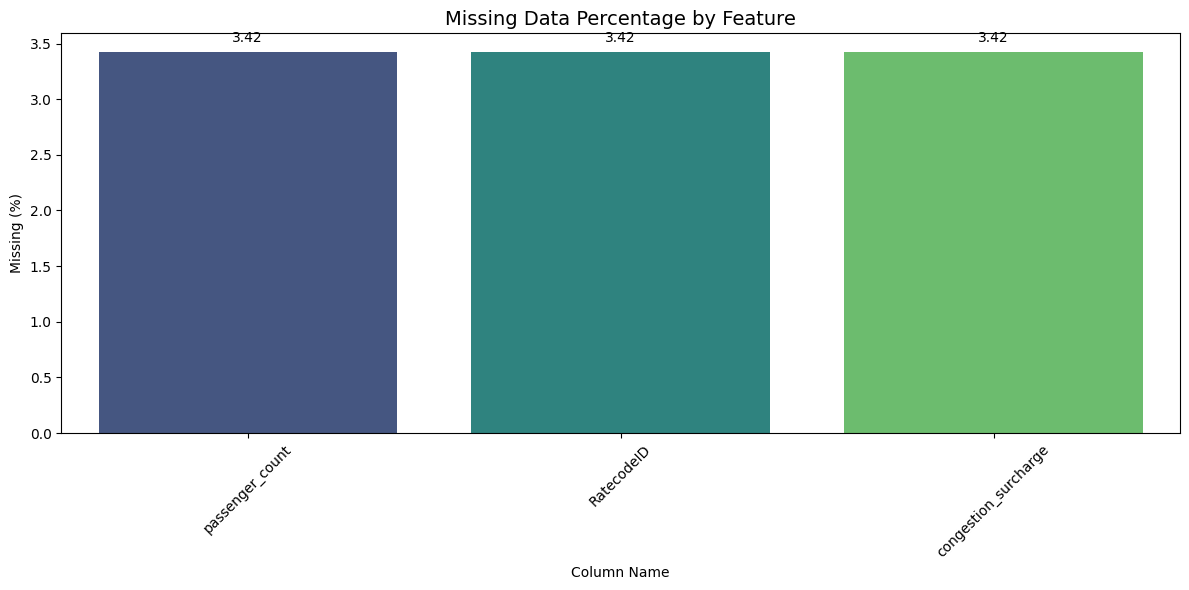

In [69]:
# Compute percentage of missing values and visualize them
missing_ratio = df.isnull().mean() * 100
missing_ratio = missing_ratio[missing_ratio > 0].sort_values(ascending=False)

plot_bar_with_labels(
    categories=missing_ratio.index,
    values=missing_ratio.values,
    title='Missing Data Percentage by Feature',
    x_label='Column Name',
    y_label='Missing (%)'
)


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [70]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
# Handle missing and zero values in 'passenger_count'
median_val = df['passenger_count'].median()
df['passenger_count'].fillna(median_val, inplace=True)
df['passenger_count'] = df['passenger_count'].replace(0, median_val).astype(int)

print(f"Remaining NaNs: {df['passenger_count'].isna().sum()} | Zero values: {(df['passenger_count'] == 0).sum()}")


Remaining NaNs: 0 | Zero values: 0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [71]:
# Fix missing values in 'RatecodeID'
# Fill missing and invalid RatecodeID values with mode
ratecode_mode = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(ratecode_mode, inplace=True)
df['RatecodeID'] = df['RatecodeID'].replace(99.0, ratecode_mode).astype(int)

print(f"Missing values: {df['RatecodeID'].isna().sum()} | Unique values: {df['RatecodeID'].nunique()}")


Missing values: 0 | Unique values: 6


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [72]:
# handle null values in congestion_surcharge
# Fix missing values in 'congestion_surcharge' using median
median_surcharge = df['congestion_surcharge'].median()
df['congestion_surcharge'].fillna(median_surcharge, inplace=True)

print(f"Missing values after fix: {df['congestion_surcharge'].isna().sum()}")

Missing values after fix: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [73]:
# Handle any remaining missing values
# Fill remaining NaNs in numeric columns with median, categorical with mode
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype.kind in 'biufc':  # numeric types
            df[col].fillna(df[col].median(), inplace=True)
        else:  # object or categorical
            df[col].fillna(df[col].mode()[0], inplace=True)



### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

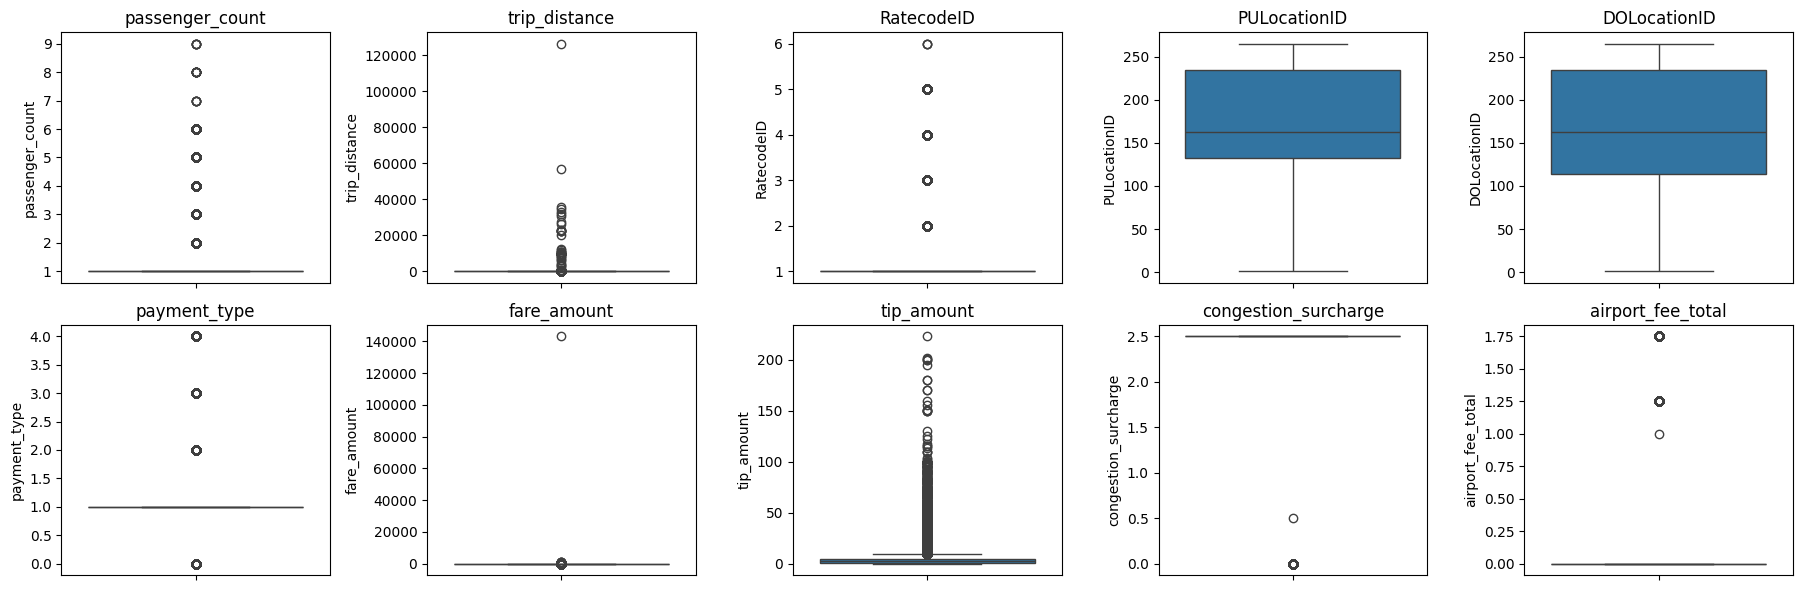

In [74]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
# Visual inspection for numeric columns
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_check = ['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 
                 'DOLocationID', 'payment_type', 'fare_amount', 'tip_amount', 
                 'congestion_surcharge', 'airport_fee_total']

fig, axes = plt.subplots(nrows=2, ncols=int(len(cols_to_check)/2), figsize=(18, 6))
axes = axes.flatten()

for i, col in enumerate(cols_to_check):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [75]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6].reset_index(drop=True)


In [76]:
# Continue with outlier handling

# Remove trips with trip_distance > 250 miles (unrealistic for NYC taxi)
df = df[df['trip_distance'] <= 250]

# Remove trips where trip_distance is nearly 0 but fare_amount > 300 (likely error)
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

# Remove trips where trip_distance and fare_amount are 0 but pickup and dropoff zones are different
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

# Remove trips with payment_type == 0 (invalid according to data dictionary)
df = df[df['payment_type'] != 0]

df.reset_index(drop=True, inplace=True)



In [77]:
%pip install scikit-learn

from sklearn.preprocessing import StandardScaler

# Do any columns need standardising?

# Standardising is usually needed for features used in modeling, especially continuous variables with different scales.
# For EDA, it's not strictly necessary, but if you plan to use features like 'trip_distance', 'fare_amount', 'total_amount', etc., for modeling, you can standardise them.

cols_to_standardise = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'congestion_surcharge', 'airport_fee_total']

scaler = StandardScaler()
df_standardised = df.copy()
df_standardised[cols_to_standardise] = scaler.fit_transform(df[cols_to_standardise])

df_standardised.head()




[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\nainw\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15                1   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36                3   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55                1   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33                2   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0       0.944870           1           138           256             2   
1      -0.485031           1           161           237             1   
2      -0.441034           1           237           141             2   
3      -0.639020           1           143           142             2   
4       0.804080           1           246            37             1   

   fare_amount  extra  tip_amount  improvement_surcharge  total_amount  \
0     0.117230    6.0   -0.878138                    1.0      0.112826   
1    -0.111019    1.0   -0.244144                    1.0     -0.124383   
2    -0.078412    1.0   -0.878138                    1.0     -0.115882   
3    -0.124062    1.0   -0.878138                    1.0     -0.161162   
4     0.136794    3.5    1.063163                    1.0      0.170580   

   congestion_surcharge pickup_datetime_temp pickup_date_only  \
0             -3.465255  2023-01-01 00:07:18       2023-01-01   
1              0.288579  2023-01-01 00:16:41       2023-01-01   
2              0.288579  2023-01-01 00:14:03       2023-01-01   
3              0.288579  2023-01-01 00:24:30       2023-01-01   
4              0.288579  2023-01-01 00:42:56       2023-01-01   

   airport_fee_total  
0           2.381514  
1          -0.307453  
2          -0.307453  
3          -0.307453  
4          -0.307453

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [78]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_datetime_temp',
 'pickup_date_only',
 'airport_fee_total']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

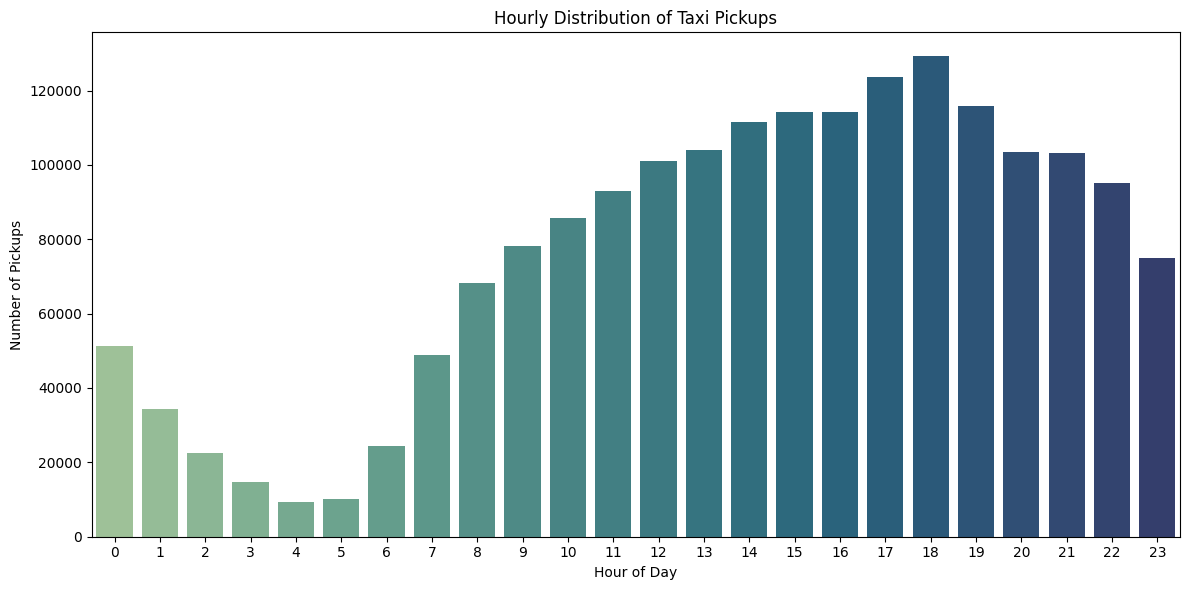

In [79]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_counts = df['pickup_hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="crest")
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Distribution of Taxi Pickups')
plt.xticks(range(24))
plt.tight_layout()
plt.show()



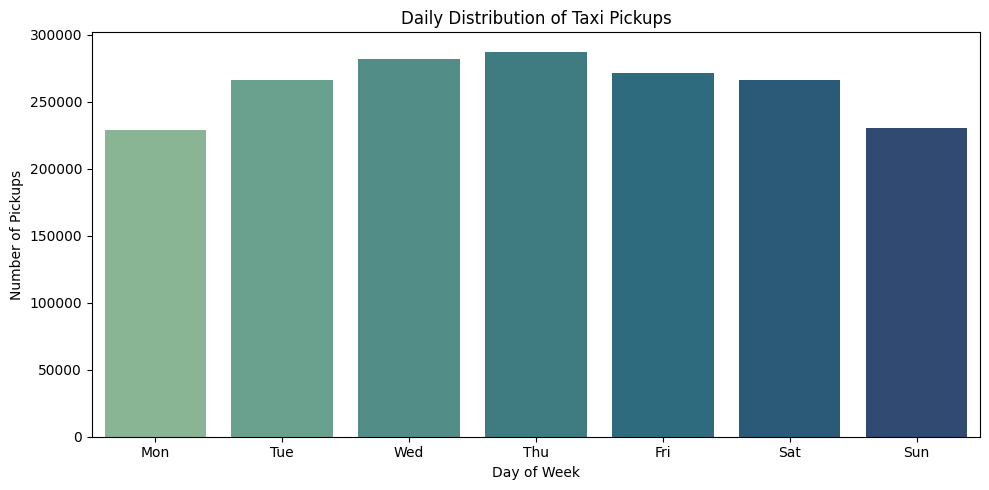

In [80]:
# Find and show the daily trends in taxi pickups (days of the week) using a bar plot
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_counts = df['pickup_dayofweek'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=day_names, y=daily_counts.values, palette="crest")
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.title('Daily Distribution of Taxi Pickups')
plt.tight_layout()
plt.show()



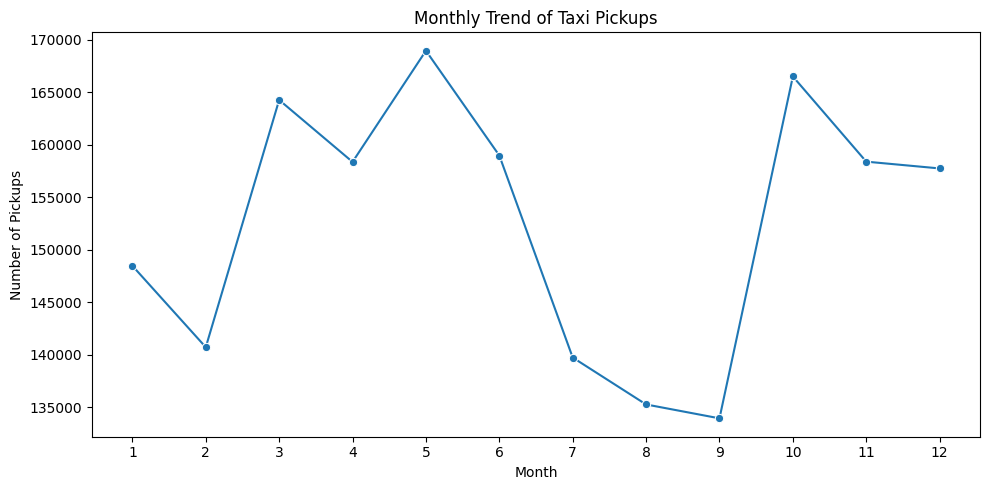

In [81]:
# Show the monthly trends in pickups using a line plot
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
monthly_counts = df['pickup_month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.title('Monthly Trend of Taxi Pickups')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [82]:
# Analyse the above parameters
for col in ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']:
    zero_count = (df[col] == 0).sum()
    neg_count = (df[col] < 0).sum()
    print(f"{col}: Zero values = {zero_count}, Negative values = {neg_count}")



fare_amount: Zero values = 575, Negative values = 0
tip_amount: Zero values = 410234, Negative values = 0
total_amount: Zero values = 255, Negative values = 0
trip_distance: Zero values = 22928, Negative values = 0


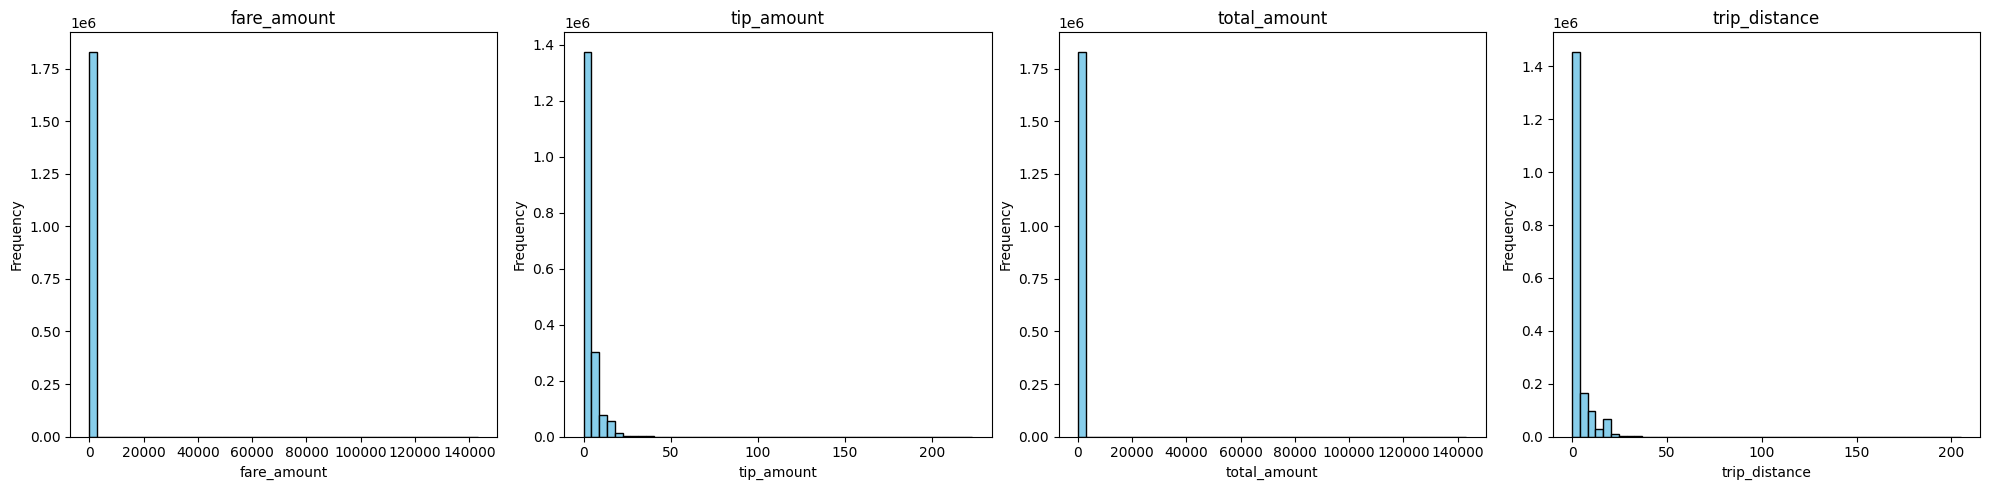

In [85]:
cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

fig, axs = plt.subplots(ncols=4, figsize=(20, 5))

for ax, col in zip(axs.flatten(), cols):
    ax.hist(df[col], bins=50, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

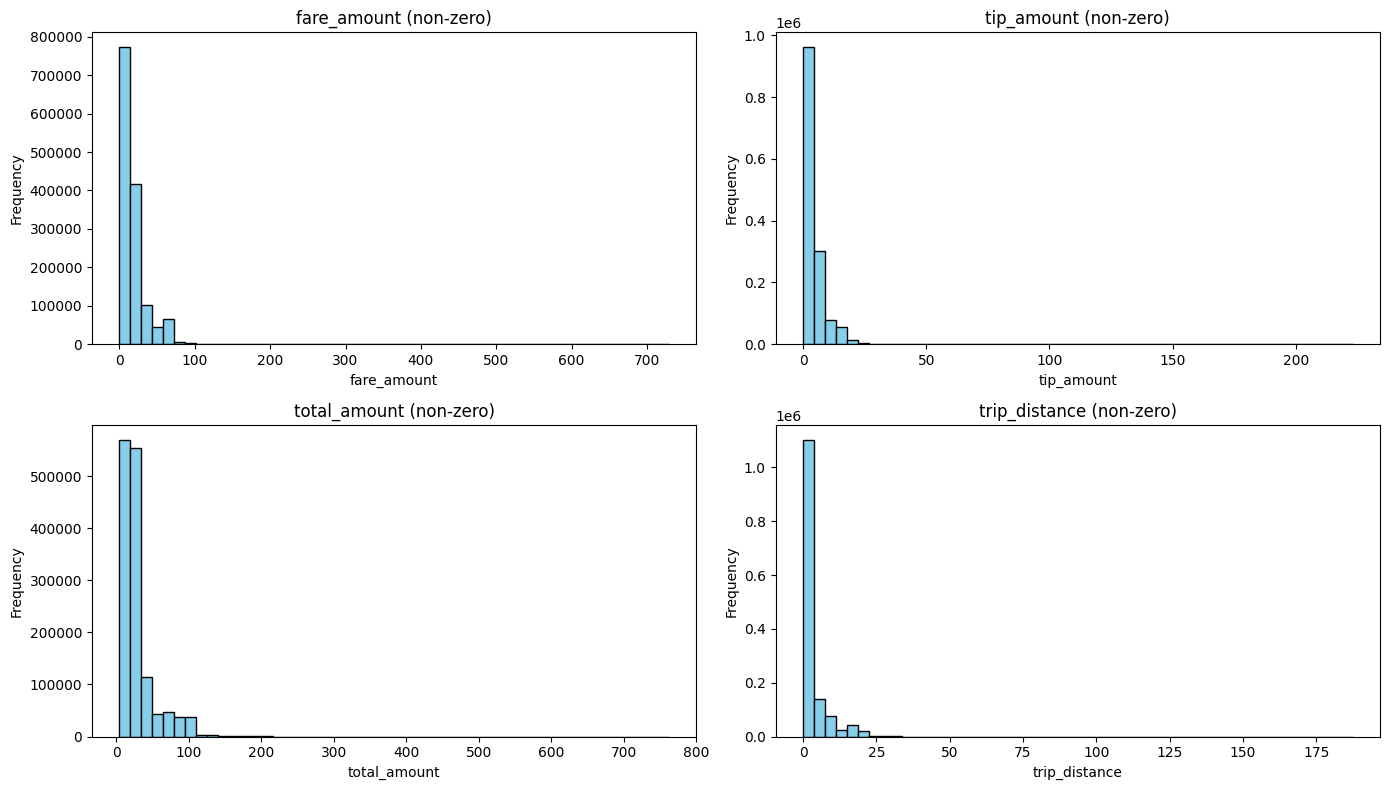

In [86]:
# Create a df with non zero entries for the selected parameters.
cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df_nonzero = df[(df[cols] != 0).all(axis=1)]

# Plot histograms for each column after filtering zeros
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()
for i, col in enumerate(cols):
    axes[i].hist(df_nonzero[col], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col} (non-zero)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()



**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

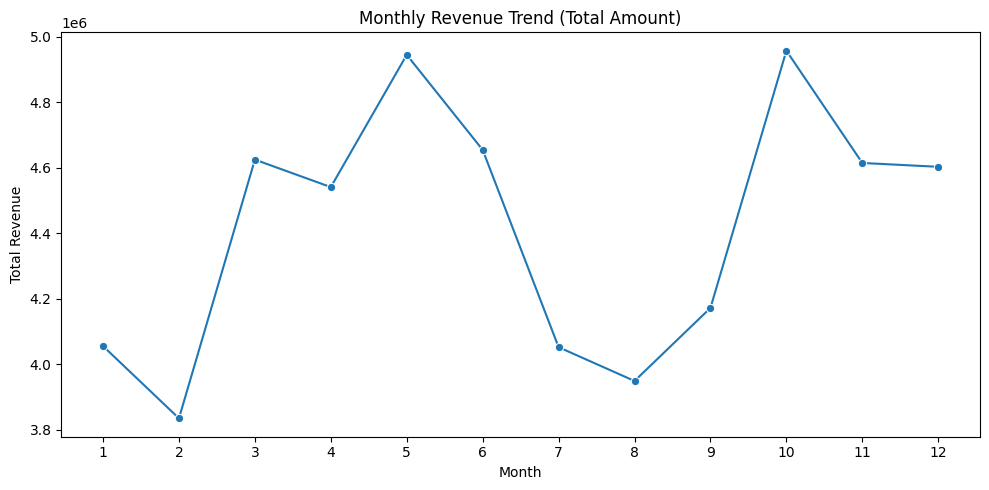

In [87]:
# Group data by month and analyse monthly revenue using a line plot
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend (Total Amount)')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

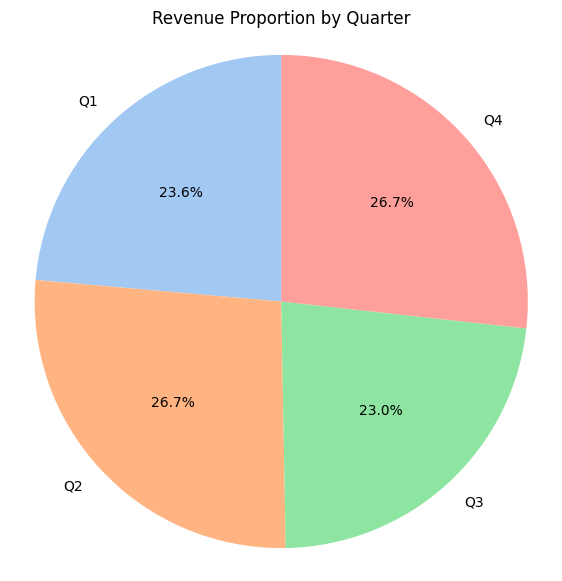

In [88]:
# Calculate total revenue for each quarter
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']
df['quarter'] = df['pickup_month'].apply(lambda x: (x - 1) // 3 + 1)
quarter_revenue = df.groupby('quarter')['total_amount'].sum().reindex([1, 2, 3, 4])

# Pie plot for revenue share by quarter
plt.figure(figsize=(7, 7))
plt.pie(quarter_revenue, labels=quarter_labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Revenue Proportion by Quarter')
plt.axis('equal')
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

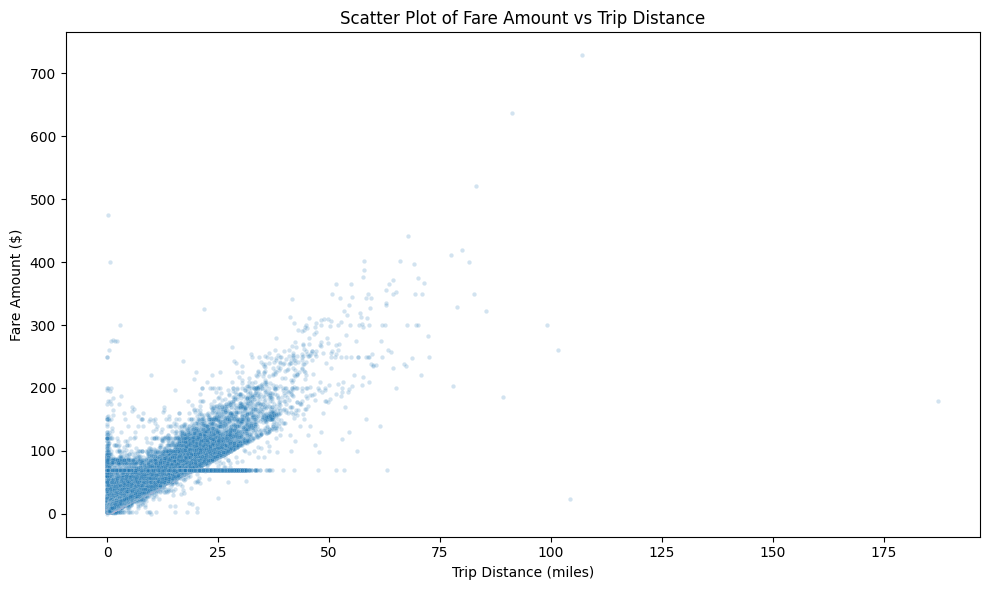

Correlation between trip_distance and fare_amount: 0.950


In [89]:
# Show how trip fare is affected by distance using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_nonzero, x='trip_distance', y='fare_amount', alpha=0.2, s=10)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Scatter Plot of Fare Amount vs Trip Distance')
plt.tight_layout()
plt.show()

# Calculate and print correlation
corr = df_nonzero['trip_distance'].corr(df_nonzero['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {corr:.3f}")



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

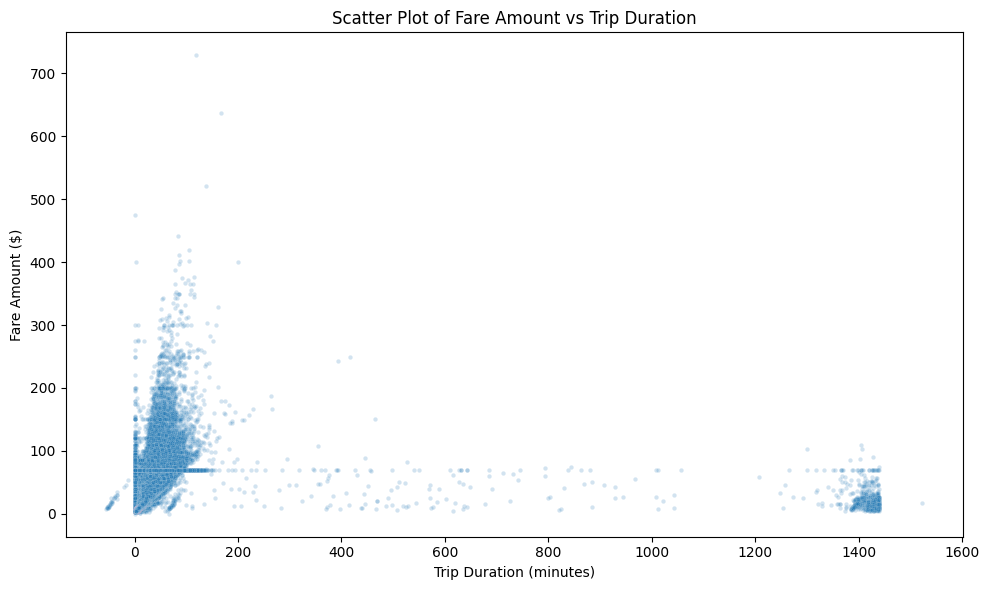

Correlation between fare_amount and trip_duration: 0.328


In [90]:
# Show relationship between fare and trip duration
df_nonzero['trip_duration'] = (df_nonzero['tpep_dropoff_datetime'] - df_nonzero['tpep_pickup_datetime']).dt.total_seconds() / 60  # duration in minutes

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_nonzero, x='trip_duration', y='fare_amount', alpha=0.2, s=10)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.title('Scatter Plot of Fare Amount vs Trip Duration')
plt.tight_layout()
plt.show()

# Correlation value
corr_duration = df_nonzero['trip_duration'].corr(df_nonzero['fare_amount'])
print(f"Correlation between fare_amount and trip_duration: {corr_duration:.3f}")



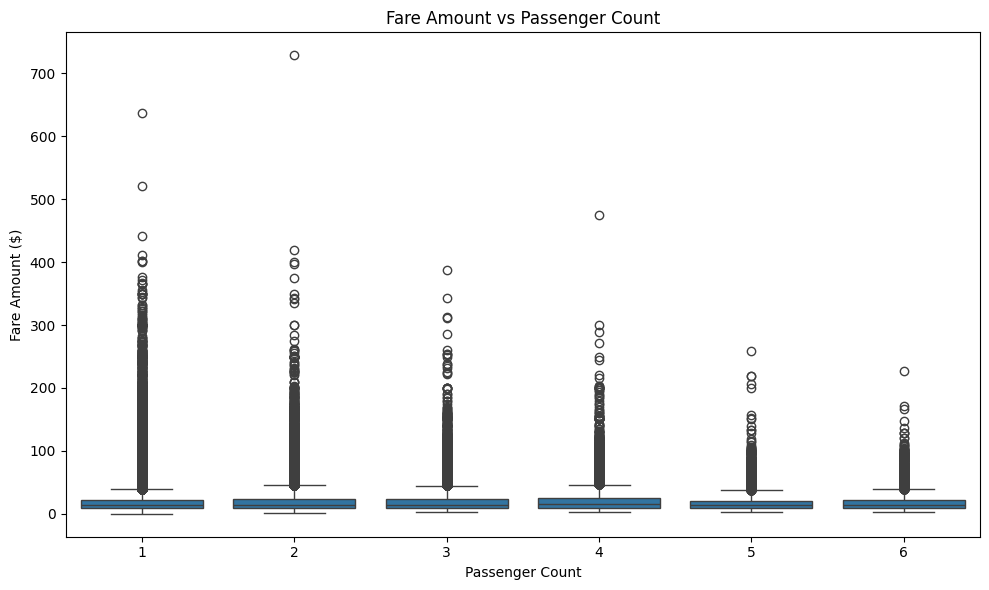

Correlation between fare_amount and passenger_count: 0.039


In [91]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df_nonzero)
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.title('Fare Amount vs Passenger Count')
plt.tight_layout()
plt.show()

# Correlation value
corr_passenger = df_nonzero['fare_amount'].corr(df_nonzero['passenger_count'])
print(f"Correlation between fare_amount and passenger_count: {corr_passenger:.3f}")



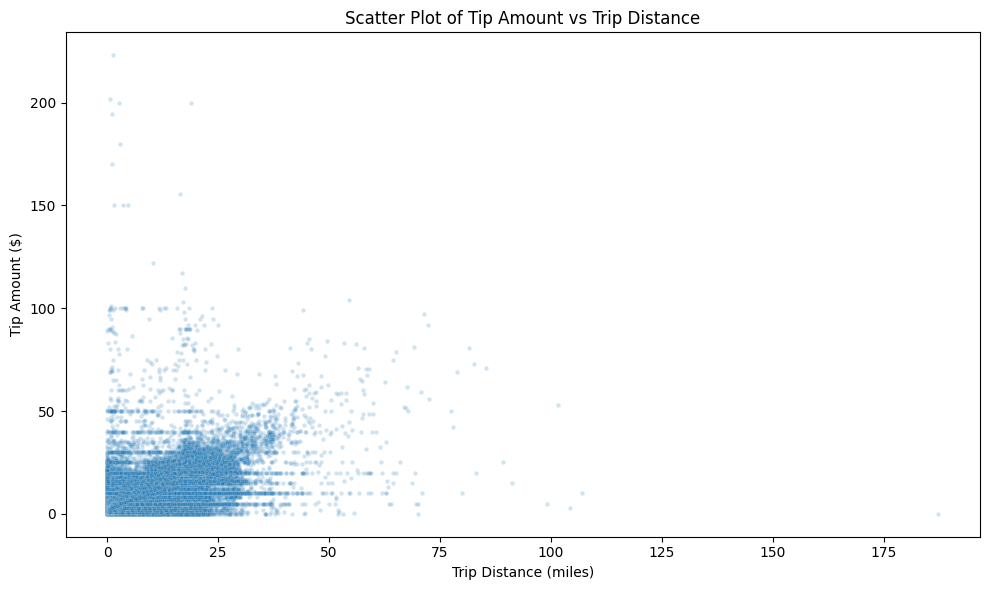

Correlation between tip_amount and trip_distance: 0.799


In [92]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_nonzero, x='trip_distance', y='tip_amount', alpha=0.2, s=10)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.title('Scatter Plot of Tip Amount vs Trip Distance')
plt.tight_layout()
plt.show()

# Correlation value
corr_tip_distance = df_nonzero['trip_distance'].corr(df_nonzero['tip_amount'])
print(f"Correlation between tip_amount and trip_distance: {corr_tip_distance:.3f}")



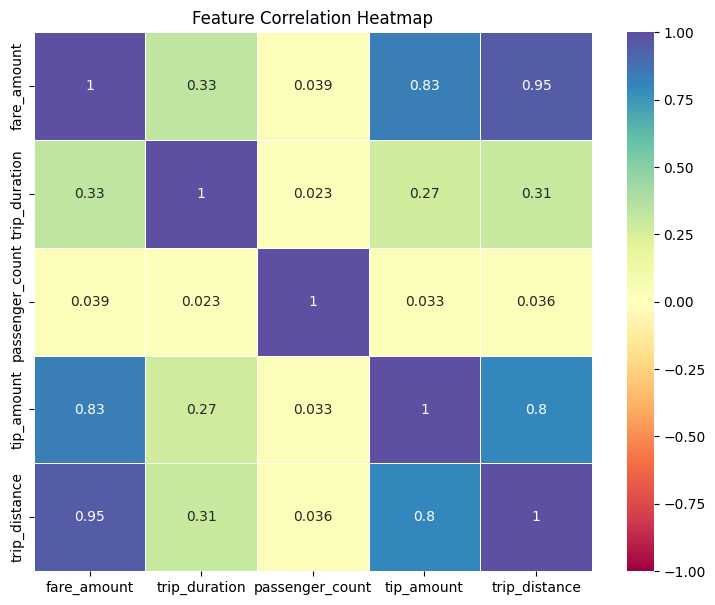

In [93]:
# Compute and visualize the correlation matrix for selected numerical features
selected_cols = ['fare_amount', 'trip_duration', 'passenger_count', 'tip_amount', 'trip_distance']

# Calculate correlation matrix using non-zero filtered data
corr_matrix = df_nonzero[selected_cols].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

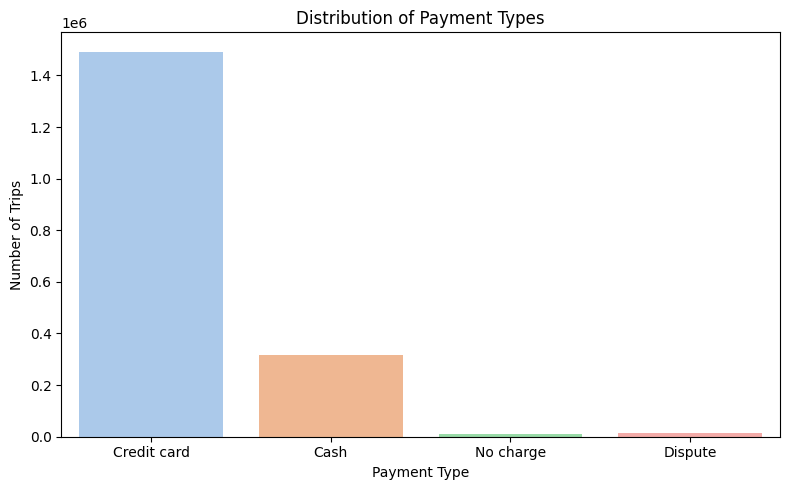

In [94]:
# Analyse the distribution of different payment types (payment_type).
payment_type_labels = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

payment_counts = df['payment_type'].value_counts().sort_index()
labels = [payment_type_labels.get(i, str(i)) for i in payment_counts.index]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=payment_counts.values, palette="pastel")
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.title('Distribution of Payment Types')
plt.tight_layout()
plt.show()




- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [72]:
# Install geopandas if not already installed
!pip install geopandas

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   --- ------------------------------------ 30.7/323.6 kB 1.4 MB/s eta 0:00:01
   ------- -------------------------------- 61.4/323.6 kB 1.1 MB/s eta 0:00:01
   ------- -------------------------------- 61.4/323.6 kB 1.1 MB/s eta 0:00:01
   ------------- ------------------------ 112.6/323.6 kB 656.4 kB/s eta 0:00:01
   -------------------- ----------------- 174.1/323.6 kB 876.1 kB/s eta 0:00:01
   ---------------------- --------------- 194.6/323.6 kB 908.0 kB/s eta 0:00:01
   ------------------------------ ------- 256.0/323.6 kB 827.5 kB/s eta 0:00:01
   ------------------------------------ - 307.2/323.6 kB 951.8 kB/s eta 0:00:01
   -------------------------------------- 323.6/323.6 kB 872.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/19.2 MB 2.6 MB/s eta 0:00:08
   ---------------------------------------- 0.2/19.2 MB 2.2 MB/s 


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\nainw\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [95]:
import geopandas as gpd
from pathlib import Path

# Use the provided variables for the shapefile path
shapefile_path = Path("Z:/NYC TAXI 2023 EDA/py assign 1 Starter-Notebook-EDA-NYC-Taxi/Datasets and Dictionary-NYC (1)/Datasets and Dictionary/taxi_zones/taxi_zones.shp")
if shapefile_path.exists():
	zones = gpd.read_file(str(shapefile_path))
	display(zones.head())
else:
	print(f"Shapefile not found at: {shapefile_path}")

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


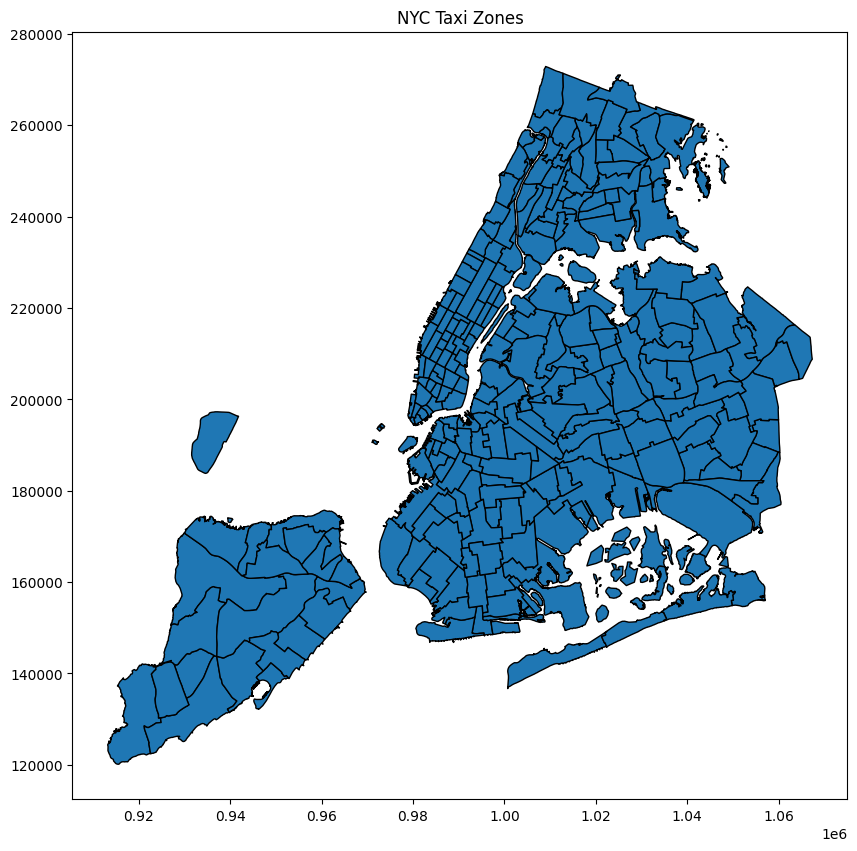

In [96]:
print(zones.info())
zones.plot(figsize=(10, 10), edgecolor='black')
plt.title('NYC Taxi Zones')
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [97]:
# Merge zones and trip records using locationID and PULocationID
df_zones_merged = df.merge(zones[['LocationID', 'zone', 'borough', 'geometry']],
                           left_on='PULocationID', right_on='LocationID', how='left',
                           suffixes=('', '_PUZone'))
df_zones_merged.rename(columns={'zone': 'PUZone', 'borough': 'PUBorough', 'geometry': 'PUGeometry'}, inplace=True)
df_zones_merged.head()



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15                1   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36                3   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55                1   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33                2   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74           1           138           256             2   
1           1.24           1           161           237             1   
2           1.44           1           237           141             2   
3           0.54           1           143           142             2   
4           7.10           1           246            37             1   

   fare_amount  extra  tip_amount  improvement_surcharge  total_amount  \
0         32.4    6.0        0.00                    1.0         41.15   
1          7.9    1.0        2.58                    1.0         15.48   
2         11.4    1.0        0.00                    1.0         16.40   
3          6.5    1.0        0.00                    1.0         11.50   
4         34.5    3.5        7.90                    1.0         47.40   

   congestion_surcharge pickup_datetime_temp pickup_date_only  \
0                   0.0  2023-01-01 00:07:18       2023-01-01   
1                   2.5  2023-01-01 00:16:41       2023-01-01   
2                   2.5  2023-01-01 00:14:03       2023-01-01   
3                   2.5  2023-01-01 00:24:30       2023-01-01   
4                   2.5  2023-01-01 00:42:56       2023-01-01   

   airport_fee_total  pickup_hour  pickup_dayofweek  pickup_month  quarter  \
0               1.25            0                 6             1        1   
1               0.00            0                 6             1        1   
2               0.00            0                 6             1        1   
3               0.00            0                 6             1        1   
4               0.00            0                 6             1        1   

   LocationID                     PUZone  PUBorough  \
0       138.0          LaGuardia Airport     Queens   
1       161.0             Midtown Center  Manhattan   
2       237.0      Upper East Side South  Manhattan   
3       143.0        Lincoln Square West  Manhattan   
4       246.0  West Chelsea/Hudson Yards  Manhattan   

                                          PUGeometry  
0  MULTIPOLYGON (((1019904.219 225677.983, 102031...  
1  POLYGON ((991081.026 214453.698, 990952.644 21...  
2  POLYGON ((993633.442 216961.016, 993507.232 21...  
3  POLYGON ((989338.1 223572.253, 989368.225 2235...  
4  POLYGON ((983031.177 217138.506, 983640.32 216...

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [98]:
# Group data by pickup location (PULocationID) and count number of trips per location
trips_per_location = df_zones_merged.groupby('PULocationID').size().reset_index(name='trip_count')
trips_per_location.head()



PULocationID  trip_count
0             1         214
1             2           2
2             3          40
3             4        1861
4             5          13

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

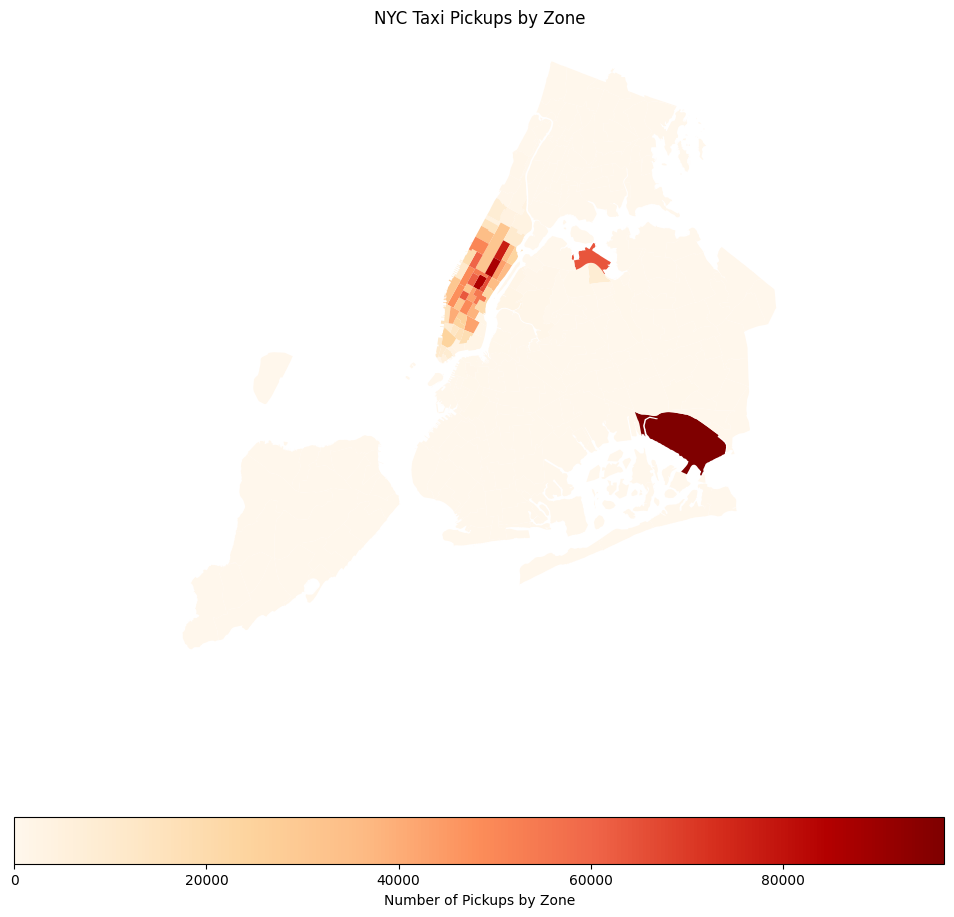

In [99]:
# Merge trip counts into the zones GeoDataFrame
zones_with_counts = zones.merge(trips_per_location, left_on='LocationID', right_on='PULocationID', how='left')

# Replace missing trip counts with 0 for zones without trips
zones_with_counts['trip_count'] = zones_with_counts['trip_count'].fillna(0)

# Visualize total trips per zone on the NYC map
zones_with_counts.plot(
    column='trip_count',
    cmap='OrRd',
    legend=True,
    legend_kwds={'label': "Number of Pickups by Zone", 'orientation': "horizontal"},
    figsize=(12, 12)
)
plt.title('NYC Taxi Pickups by Zone')
plt.axis('off')
plt.show()


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

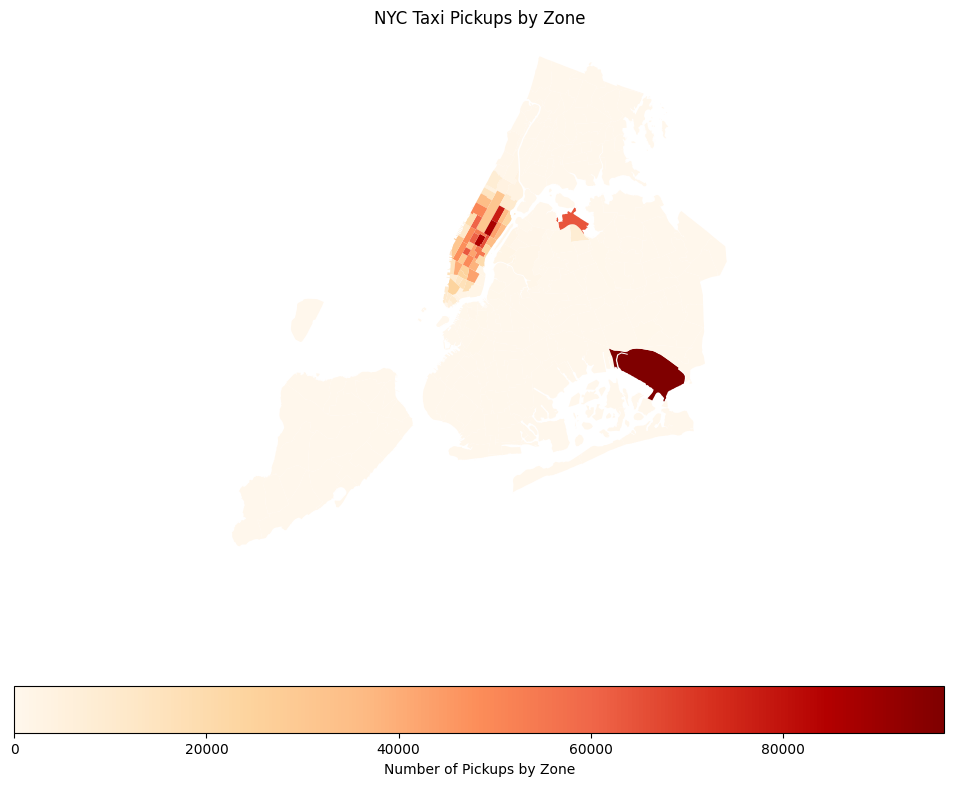

In [100]:
# First, get trip counts by pickup location
trips_per_location = df.groupby('PULocationID').size().reset_index(name='trip_count')

# Merge trip counts with zones
zones_with_counts = zones.merge(trips_per_location, 
                              left_on='LocationID', 
                              right_on='PULocationID', 
                              how='left')

# Fill NaN values with 0 for zones without trips
zones_with_counts['trip_count'] = zones_with_counts['trip_count'].fillna(0)

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones_with_counts.plot(
    column='trip_count',
    ax=ax,
    cmap='OrRd',
    legend=True,
    legend_kwds={'label': "Number of Pickups by Zone", 'orientation': "horizontal"}
)
ax.set_title('NYC Taxi Pickups by Zone')
ax.axis('off')
plt.show()

In [101]:
# Display the zones GeoDataFrame sorted by the number of trips (descending)
zones_with_counts.sort_values('trip_count', ascending=False)[['zone', 'borough', 'trip_count']].head(10)

zone    borough  trip_count
131                   JFK Airport     Queens     96827.0
236         Upper East Side South  Manhattan     86905.0
160                Midtown Center  Manhattan     85948.0
235         Upper East Side North  Manhattan     77517.0
161                  Midtown East  Manhattan     65634.0
137             LaGuardia Airport     Queens     64177.0
185  Penn Station/Madison Sq West  Manhattan     63471.0
229     Times Sq/Theatre District  Manhattan     61315.0
141           Lincoln Square East  Manhattan     60887.0
169                   Murray Hill  Manhattan     54493.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [104]:
# Find routes which have the slowest speeds at different times of the day

# Group by (PULocationID, DOLocationID, pickup_hour) and calculate average speed (distance / duration in hours)
route_hourly = (
    df_nonzero[df_nonzero['trip_duration'] > 0]  # avoid division by zero
    .groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])
    .agg(
        avg_distance=('trip_distance', 'mean'),
        avg_duration_min=('trip_duration', 'mean'),
        trip_count=('trip_distance', 'count')
    )
    .reset_index()
)
route_hourly['avg_speed_mph'] = route_hourly['avg_distance'] / (route_hourly['avg_duration_min'] / 60)

# Find the slowest routes (lowest avg_speed_mph) for each hour, considering only routes with enough trips (e.g., >20)
slowest_routes = (
    route_hourly[route_hourly['trip_count'] > 20]
    .sort_values(['pickup_hour', 'avg_speed_mph'])
    .groupby('pickup_hour')
    .first()
    .reset_index()
)

slowest_routes[['pickup_hour', 'PULocationID', 'DOLocationID', 'avg_speed_mph', 'trip_count']]



pickup_hour  PULocationID  DOLocationID  avg_speed_mph  trip_count
0             0           234           113       0.891784          26
1             1            68            48       1.892025          37
2             2           234            48       1.611891          22
3             3            79           249       1.442371          29
4             4            79           148       9.510563          26
5             5            48           161      10.551070          62
6             6           100           170       7.682078          29
7             7           170           107       1.546867          33
8             8           161           161       1.530605          92
9             9           170           164       1.482206          66
10           10           233           186       1.519864          31
11           11            43           141       1.262115          28
12           12            50            68       1.164209          23
13           13           113           113       0.528333          24
14           14            79            79       0.853882          30
15           15           231            13       1.172395          38
16           16            50            68       1.232401          25
17           17           114           113       1.079148          38
18           18           166           151       1.350386          41
19           19            90           100       0.919491          29
20           20            48           233       1.303646          24
21           21           164           100       0.698720          23
22           22           246           186       1.056468          30
23           23           170           230       0.989696          25

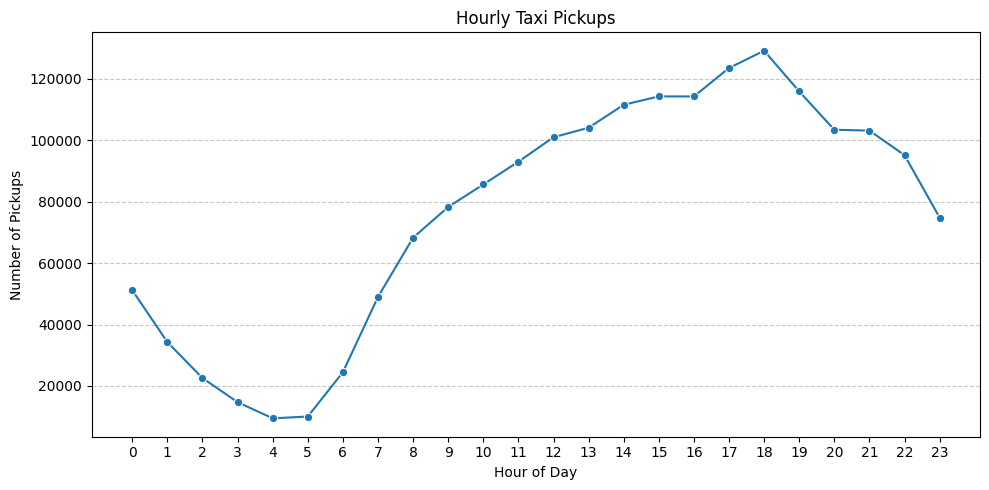

In [107]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Taxi Pickups')
plt.xticks(range(24))
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

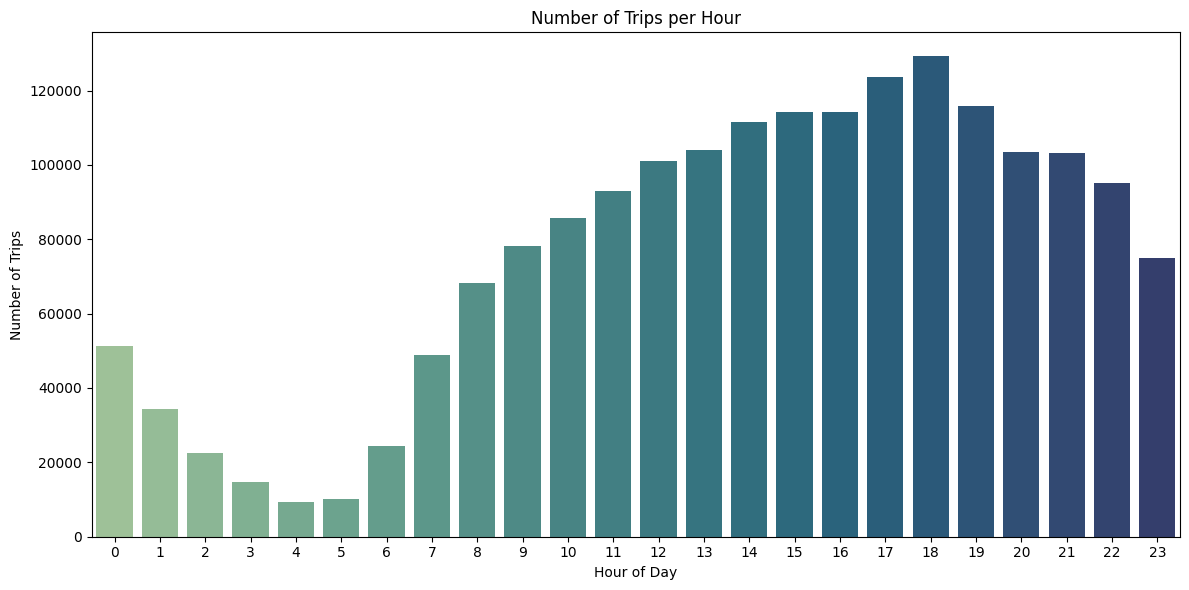

Busiest hour: 18:00 with 129190 trips


In [105]:
# Visualise the number of trips per hour and find the busiest hour

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="crest")
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Hour')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

busiest_hour = hourly_counts.idxmax()
busiest_count = hourly_counts.max()
print(f"Busiest hour: {busiest_hour}:00 with {busiest_count} trips")



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [111]:
# Find the five busiest hours
busiest_hours = hourly_counts.nlargest(5)

# Display the actual number of trips in the five busiest hours
print("Actual number of trips in the five busiest hours:")
print(busiest_hours)


Actual number of trips in the five busiest hours:
pickup_hour
18    129190
17    123563
19    115920
15    114301
16    114289
Name: count, dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

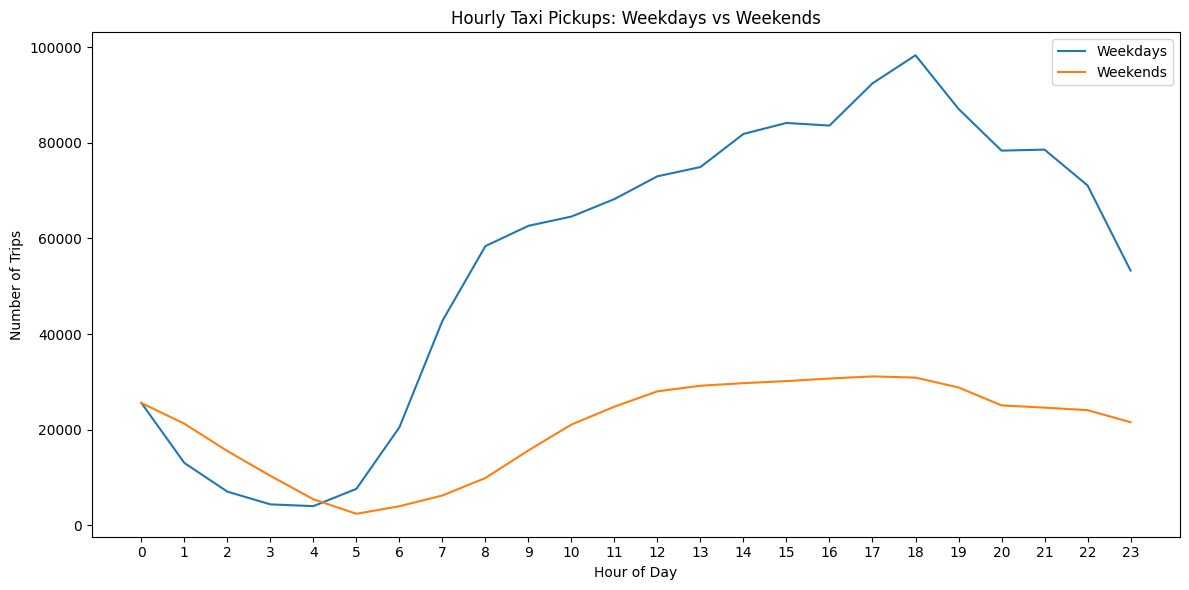

In [112]:
# Compare traffic trends for the week days and weekends

# 0=Monday, ..., 6=Sunday; weekends are 5 (Saturday) and 6 (Sunday)
weekday_data = df[df['pickup_dayofweek'] < 5]
weekend_data = df[df['pickup_dayofweek'] >= 5]

weekday_hourly = weekday_data['pickup_hour'].value_counts().sort_index()
weekend_hourly = weekend_data['pickup_hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=weekday_hourly.index, y=weekday_hourly.values, label='Weekdays')
sns.lineplot(x=weekend_hourly.index, y=weekend_hourly.values, label='Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Taxi Pickups: Weekdays vs Weekends')
plt.xticks(range(24))
plt.legend()
plt.tight_layout()
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**Summary of Patterns and Insights:**

- **Peak and Off-Peak Hours:** Taxi demand is highest in the late afternoon and early evening, especially around 5–7 PM, likely due to end-of-workday travel. The lowest activity is seen in the early morning hours (2–5 AM).

- **Weekday vs. Weekend:** Weekdays show sharp increases during commute times, while weekends have a more even distribution of rides throughout the day.

- **Monthly and Revenue Trends:** Certain months, such as May and October, see more trips and higher revenue, possibly influenced by weather or events. Revenue also varies by quarter.

- **Operational Benefits:** Knowing when and where demand peaks allows for better taxi allocation, smarter driver scheduling, and the use of dynamic pricing to balance supply and demand.

- **Customer and Business Impact:** Ensuring enough taxis during busy times improves customer satisfaction, while offering incentives during slow periods can boost ridership and revenue.

- **Strategic Planning:** These insights help optimize operations, improve efficiency, and support data-driven decision-making for both drivers and fleet managers.


**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top 10 Pickup Zones (by LocationID):
PULocationID
132    96827
237    86905
161    85948
236    77517
162    65634
138    64177
186    63471
230    61315
142    60887
170    54493
Name: count, dtype: int64

Top 10 Dropoff Zones (by LocationID):
DOLocationID
236    81269
237    77558
161    71647
230    56398
170    54314
162    52248
142    51494
239    51260
141    48449
68     46352
Name: count, dtype: int64


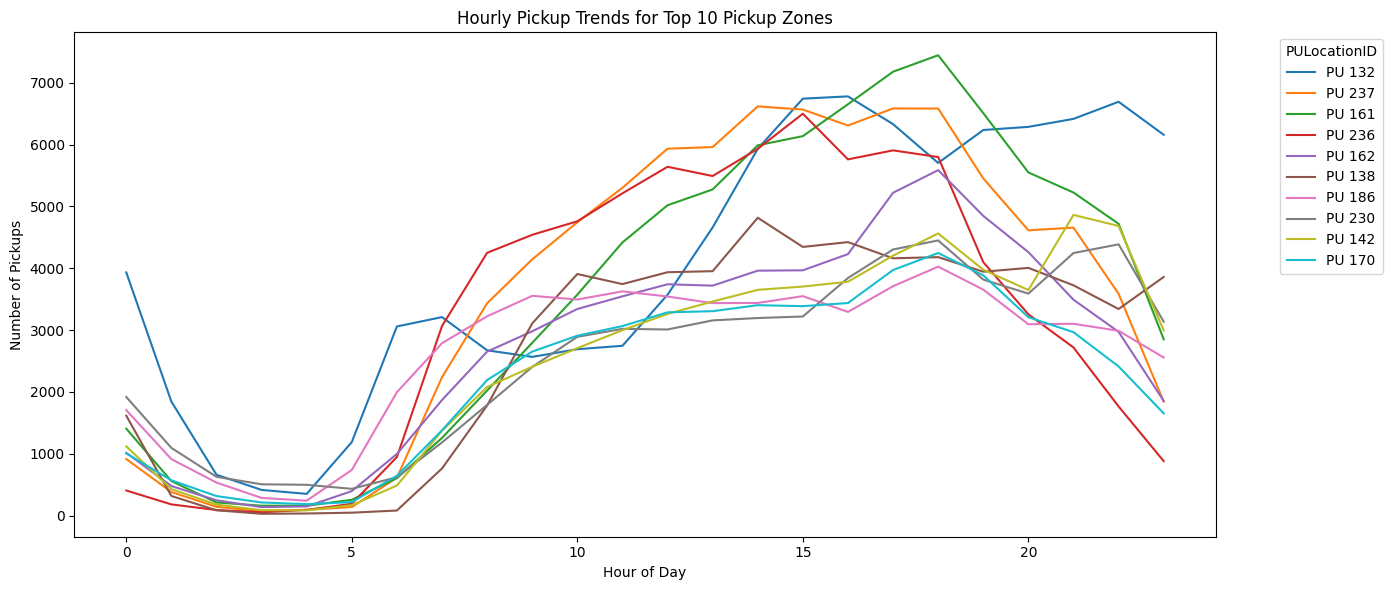

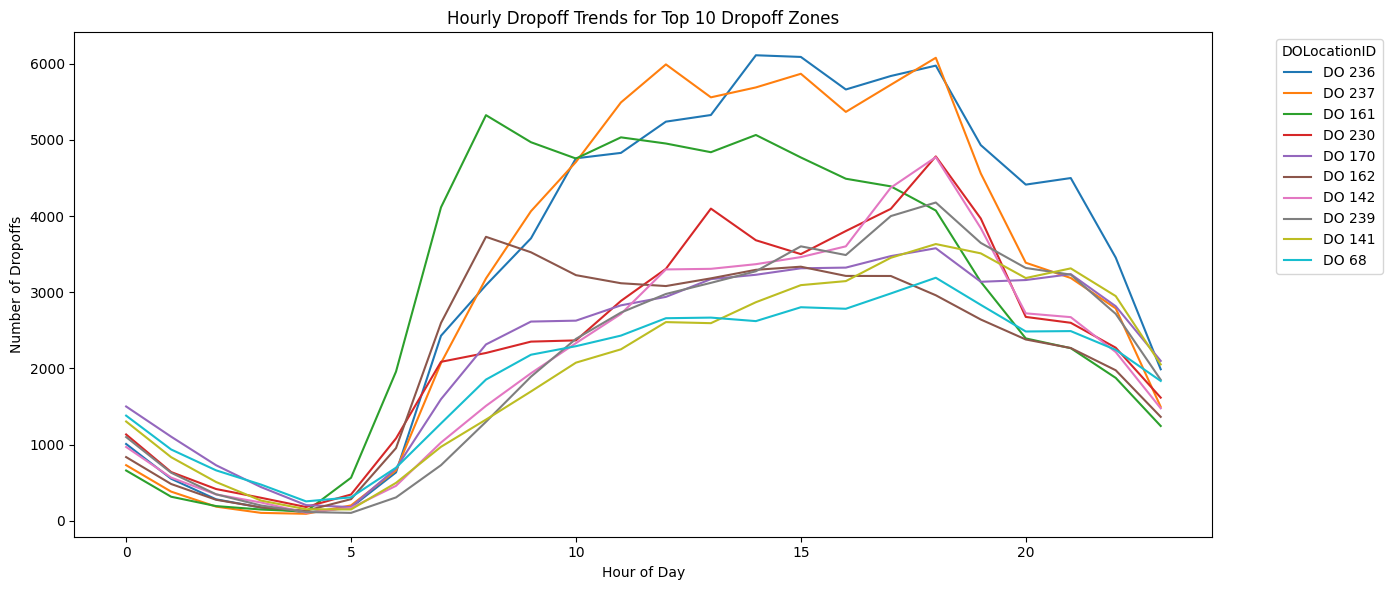

In [114]:
# Find top 10 pickup zones
top10_pickup = df['PULocationID'].value_counts().head(10)
print("Top 10 Pickup Zones (by LocationID):")
print(top10_pickup)

# Find top 10 dropoff zones
top10_dropoff = df['DOLocationID'].value_counts().head(10)
print("\nTop 10 Dropoff Zones (by LocationID):")
print(top10_dropoff)

# Plot hourly pickup trends for top 10 pickup zones
plt.figure(figsize=(14, 6))
for loc_id in top10_pickup.index:
    hourly = df[df['PULocationID'] == loc_id]['pickup_hour'].value_counts().sort_index()
    plt.plot(hourly.index, hourly.values, label=f'PU {loc_id}')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Pickup Trends for Top 10 Pickup Zones')
plt.legend(title='PULocationID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot hourly dropoff trends for top 10 dropoff zones
plt.figure(figsize=(14, 6))
for loc_id in top10_dropoff.index:
    hourly = df[df['DOLocationID'] == loc_id]['pickup_hour'].value_counts().sort_index()
    plt.plot(hourly.index, hourly.values, label=f'DO {loc_id}')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.title('Hourly Dropoff Trends for Top 10 Dropoff Zones')
plt.legend(title='DOLocationID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [115]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Count pickups and dropoffs per zone
pickup_counts = df['PULocationID'].value_counts().sort_index()
dropoff_counts = df['DOLocationID'].value_counts().sort_index()

# Combine into a DataFrame
zone_ratios = pd.DataFrame({
    'pickups': pickup_counts,
    'dropoffs': dropoff_counts
}).fillna(0)

# Calculate ratio, avoid division by zero
zone_ratios['pickup_dropoff_ratio'] = zone_ratios['pickups'] / zone_ratios['dropoffs'].replace(0, np.nan)

# Sort and display top 10 and bottom 10
top10 = zone_ratios.sort_values('pickup_dropoff_ratio', ascending=False).head(10)
bottom10 = zone_ratios.sort_values('pickup_dropoff_ratio', ascending=True).head(10)

print("Top 10 zones by pickup/dropoff ratio:")
display(top10)

print("\nBottom 10 zones by pickup/dropoff ratio:")
display(bottom10)



Top 10 zones by pickup/dropoff ratio:


pickups  dropoffs  pickup_dropoff_ratio
70    8354.0    1004.0              8.320717
132  96827.0   20969.0              4.617626
138  64177.0   22249.0              2.884489
186  63471.0   40116.0              1.582187
43   30752.0   22369.0              1.374760
114  24113.0   17540.0              1.374743
249  40406.0   30467.0              1.326222
162  65634.0   52248.0              1.256201
161  85948.0   71647.0              1.199604
100  30207.0   25344.0              1.191880


Bottom 10 zones by pickup/dropoff ratio:


pickups  dropoffs  pickup_dropoff_ratio
30       0.0      18.0              0.000000
99       0.0       3.0              0.000000
176      0.0      12.0              0.000000
245      0.0      30.0              0.000000
27       1.0      39.0              0.025641
221      1.0      34.0              0.029412
257     29.0     758.0              0.038259
1      214.0    5319.0              0.040233
115      1.0      23.0              0.043478
198     52.0     990.0              0.052525

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [117]:
# Identify top pickup and dropoff zones specifically for night hours (11 PM to 5 AM)
night_hours = [23, 0, 1, 2, 3, 4, 5]
night_trips = df[df['pickup_hour'].isin(night_hours)]

# Count pickups by zone during night hours
pickup_night_counts = night_trips['PULocationID'].value_counts().reset_index()
pickup_night_counts.columns = ['LocationID', 'pickup_count']
top10_pickup_night = pickup_night_counts.head(10)

# Count dropoffs by zone during night hours
dropoff_night_counts = night_trips['DOLocationID'].value_counts().reset_index()
dropoff_night_counts.columns = ['LocationID', 'dropoff_count']
top10_dropoff_night = dropoff_night_counts.head(10)

print("Top 10 Pickup Zones during Night Hours (11 PM to 5 AM):")
print(top10_pickup_night)

print("\nTop 10 Dropoff Zones during Night Hours (11 PM to 5 AM):")
print(top10_dropoff_night)


Top 10 Pickup Zones during Night Hours (11 PM to 5 AM):
   LocationID  pickup_count
0          79         15552
1         132         14545
2         249         12472
3          48         10463
4         148          9629
5         114          8749
6         230          8206
7         186          6968
8         164          6143
9          68          6050

Top 10 Dropoff Zones during Night Hours (11 PM to 5 AM):
   LocationID  dropoff_count
0          79           8314
1          48           6874
2         170           6266
3          68           5858
4         107           5757
5         141           5272
6         263           4978
7         249           4944
8         230           4641
9         148           4382


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

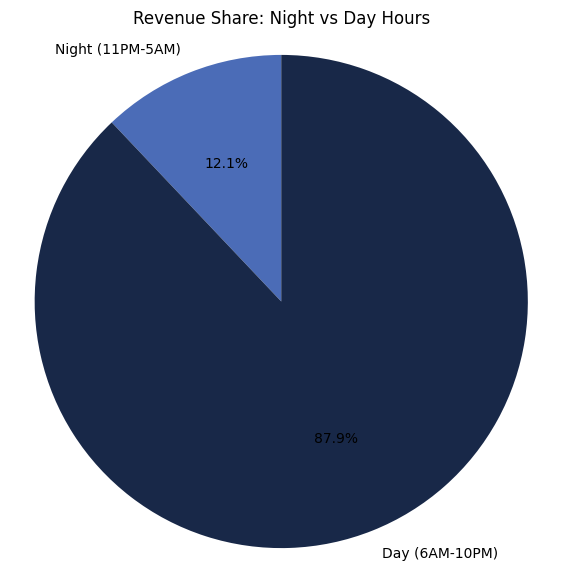

In [118]:
# Calculate revenue for night and day hours
night_revenue = night_trips['total_amount'].sum()
day_trips = df[~df['pickup_hour'].isin(night_hours)]
day_revenue = day_trips['total_amount'].sum()

# Pie chart for revenue share
labels = ['Night (11PM-5AM)', 'Day (6AM-10PM)']
sizes = [night_revenue, day_revenue]
colors = ['#4B6CB7', '#182848']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Revenue Share: Night vs Day Hours')
plt.axis('equal')
plt.show()



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [119]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter out trips with zero or missing values to avoid division by zero
valid = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]

# Calculate fare per mile per passenger
valid['fare_per_mile_per_passenger'] = valid['fare_amount'] / (valid['trip_distance'] * valid['passenger_count'])

# Group by passenger_count and calculate average fare per mile per passenger
result = valid.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
result.columns = ['passenger_count', 'avg_fare_per_mile_per_passenger']
display(result)




passenger_count  avg_fare_per_mile_per_passenger
0                1                        11.010344
1                2                         6.431558
2                3                         3.907755
3                4                         4.362648
4                5                         1.709614
5                6                         1.350658

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

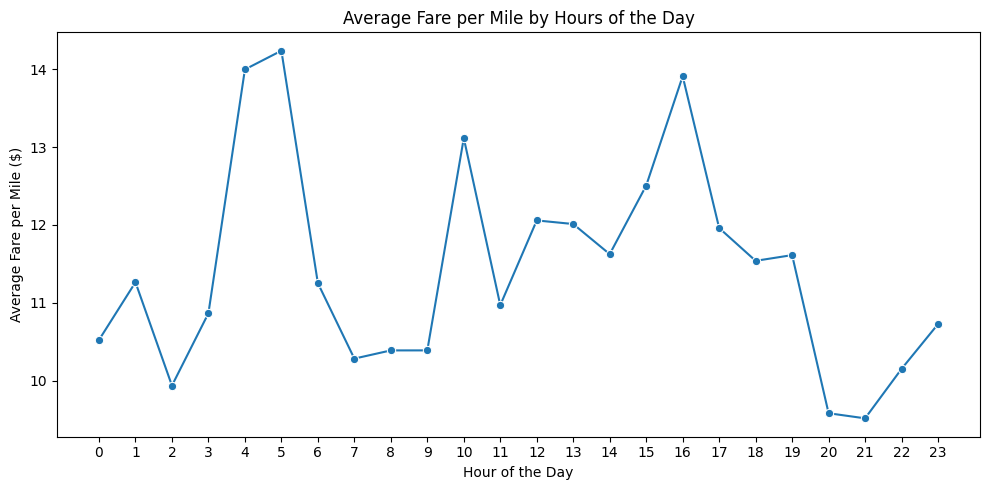

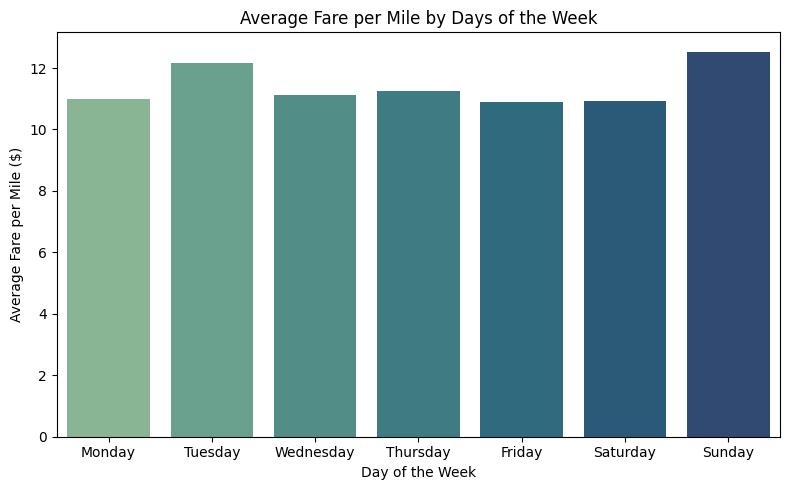

In [123]:
# Average fare per mile by hour of the day
avg_fare_per_mile_by_hour = valid.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_fare_per_mile_by_hour['pickup_hour'], y=avg_fare_per_mile_by_hour['fare_per_mile'], marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile ($)')
plt.title('Average Fare per Mile by Hours of the Day')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

# Average fare per mile by day of the week
avg_fare_per_mile_by_day = valid.groupby('pickup_dayofweek')['fare_per_mile'].mean().reset_index()
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
avg_fare_per_mile_by_day['pickup_day_name'] = avg_fare_per_mile_by_day['pickup_dayofweek'].map(day_name_map)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_fare_per_mile_by_day['pickup_day_name'], y=avg_fare_per_mile_by_day['fare_per_mile'], palette="crest")
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile ($)')
plt.title('Average Fare per Mile by Days of the Week')
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

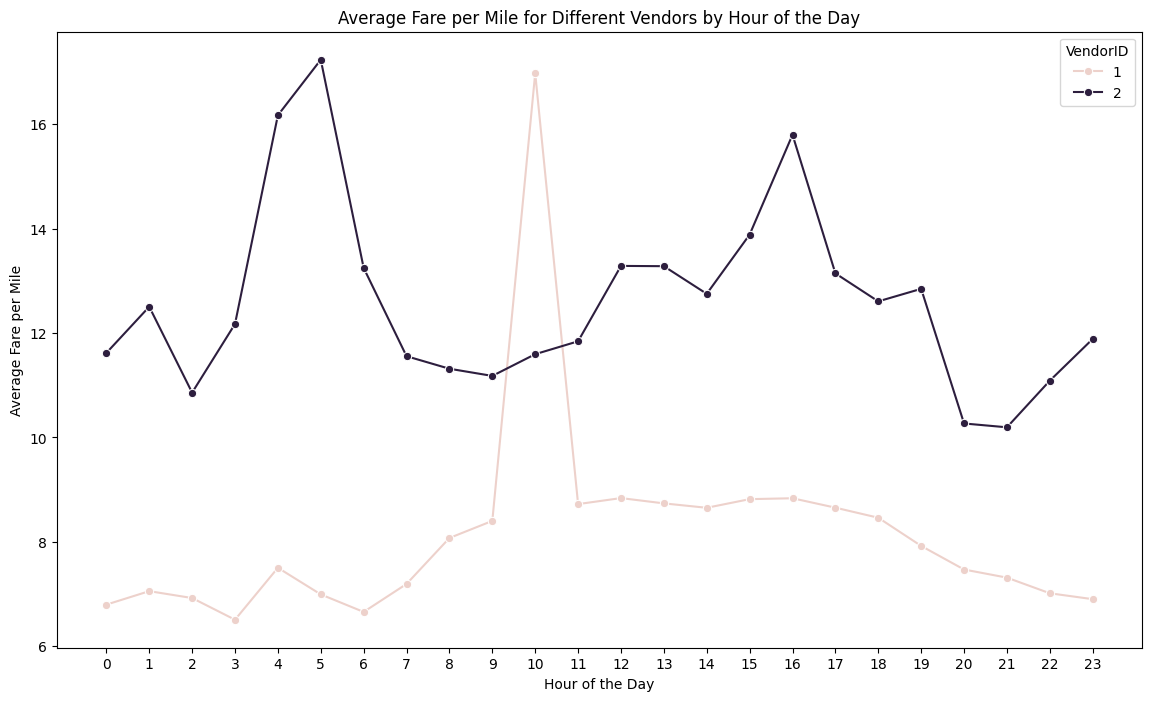

In [127]:
# Compare fare per mile for different vendors

# Group by VendorID and hour of the day to calculate the average fare per mile
# Use the correct DataFrame and columns from your context
avg_fare_per_mile_by_vendor_hour = valid.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

# Plot the average fare per mile for different vendors for different hours of the day
plt.figure(figsize=(14, 8))
sns.lineplot(x='pickup_hour', y='fare_per_mile', hue='VendorID', data=avg_fare_per_mile_by_vendor_hour, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.title('Average Fare per Mile for Different Vendors by Hour of the Day')
plt.xticks(range(24))
plt.legend(title='VendorID')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


VendorID               1          2
distance_tier                      
<=2 miles      10.669578  17.927483
2-5 miles       6.379721   6.548813
>5 miles        4.422057   4.502499

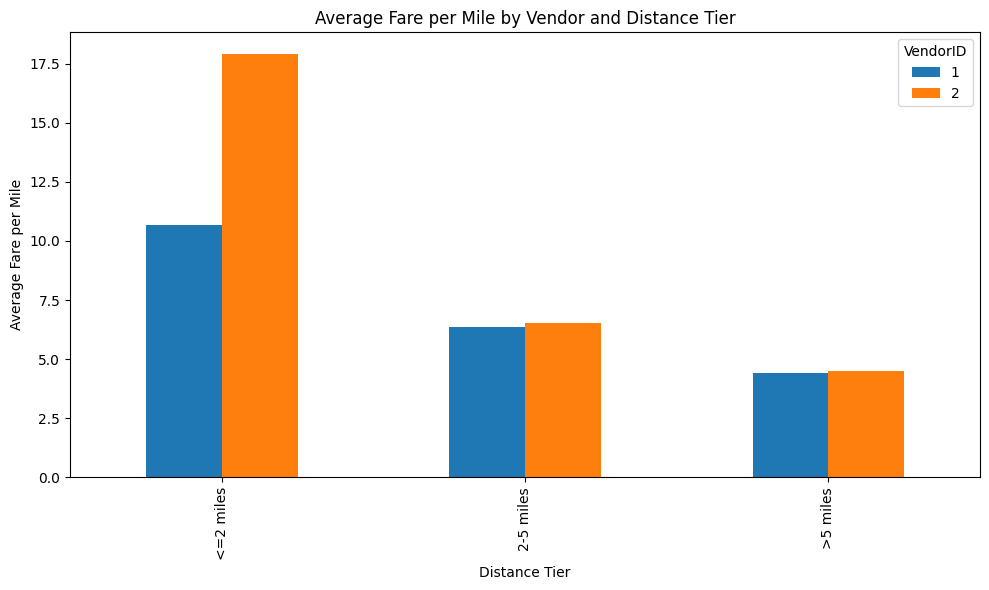

In [128]:
# Defining distance tiers
bins = [0, 2, 5, np.inf]
labels = ['<=2 miles', '2-5 miles', '>5 miles']
valid['distance_tier'] = pd.cut(valid['trip_distance'], bins=bins, labels=labels, right=True)

# Calculate average fare per mile for each vendor and distance tier
tiered_fare = (
    valid.groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
    .pivot(index='distance_tier', columns='VendorID', values='fare_per_mile')
)

display(tiered_fare)

# Optional: Plot for visual comparison
tiered_fare.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.legend(title='VendorID')
plt.tight_layout()
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

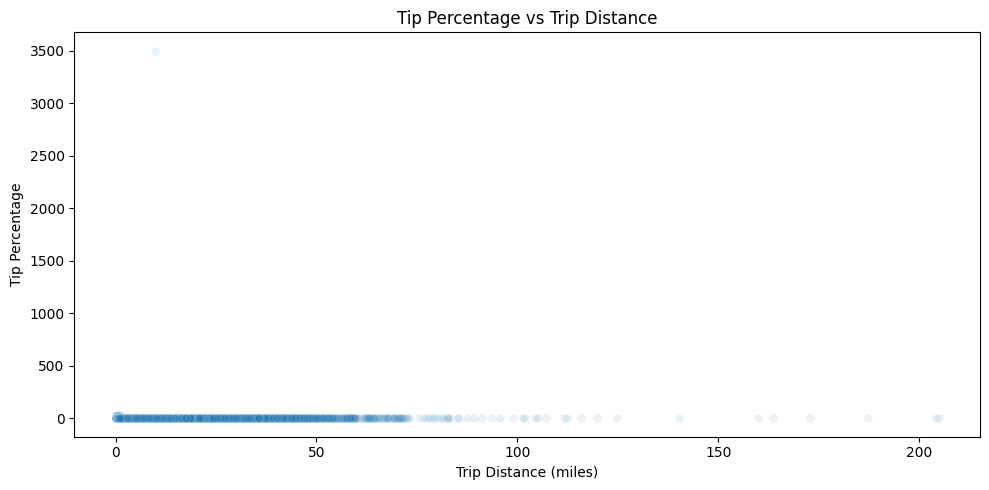

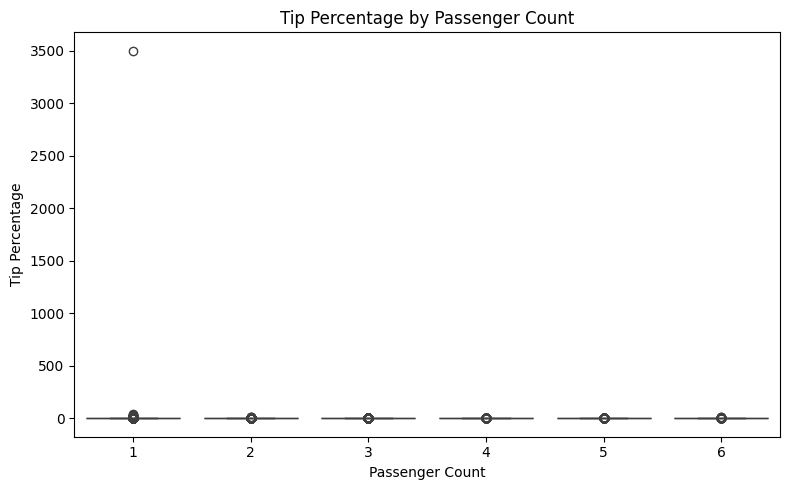

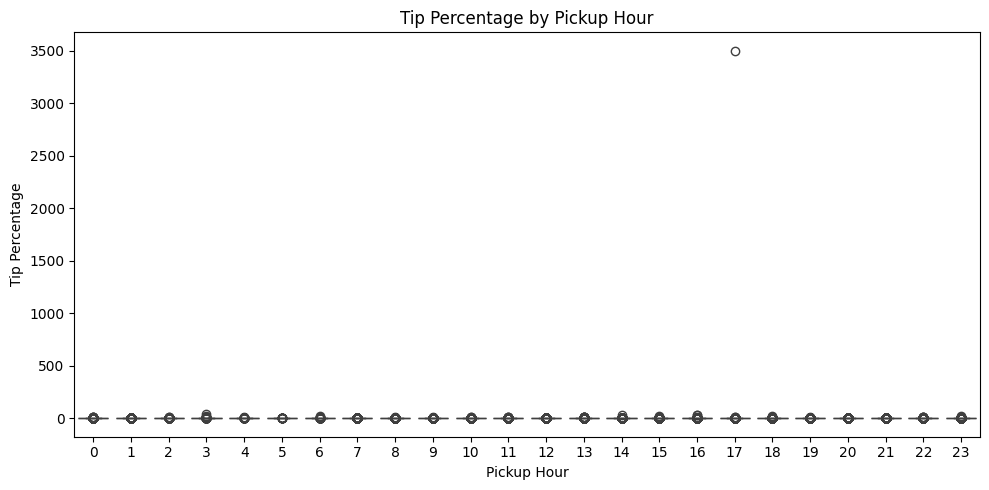

Average tip percentage by trip distance tier:


distance_tier
<=2 miles    0.224190
2-5 miles    0.187665
>5 miles     0.176407
Name: tip_pct, dtype: float64


Average tip percentage by passenger count:


passenger_count
1    0.209371
2    0.197310
3    0.190273
4    0.174555
5    0.204900
6    0.206020
Name: tip_pct, dtype: float64


Average tip percentage by pickup hour:


pickup_hour
0     0.205024
1     0.206640
2     0.206520
3     0.205129
4     0.182508
5     0.174852
6     0.184667
7     0.196056
8     0.200471
9     0.197070
10    0.192426
11    0.191954
12    0.191345
13    0.190598
14    0.190315
15    0.190108
16    0.209156
17    0.245196
18    0.222378
19    0.221799
20    0.214960
21    0.215170
22    0.213003
23    0.206571
Name: tip_pct, dtype: float64

In [129]:
# Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage (avoid division by zero)
valid = valid.copy()
valid['tip_pct'] = valid['tip_amount'] / valid['fare_amount']
valid = valid[valid['fare_amount'] > 0]

# 1. Tip percentage vs trip distance
plt.figure(figsize=(10, 5))
sns.scatterplot(x='trip_distance', y='tip_pct', data=valid, alpha=0.1)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Percentage')
plt.title('Tip Percentage vs Trip Distance')
plt.tight_layout()
plt.show()

# 2. Tip percentage vs passenger count
plt.figure(figsize=(8, 5))
sns.boxplot(x='passenger_count', y='tip_pct', data=valid)
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage')
plt.title('Tip Percentage by Passenger Count')
plt.tight_layout()
plt.show()

# 3. Tip percentage vs pickup hour
plt.figure(figsize=(10, 5))
sns.boxplot(x='pickup_hour', y='tip_pct', data=valid)
plt.xlabel('Pickup Hour')
plt.ylabel('Tip Percentage')
plt.title('Tip Percentage by Pickup Hour')
plt.tight_layout()
plt.show()

# Summary statistics
print("Average tip percentage by trip distance tier:")
display(valid.groupby('distance_tier')['tip_pct'].mean())

print("\nAverage tip percentage by passenger count:")
display(valid.groupby('passenger_count')['tip_pct'].mean())

print("\nAverage tip percentage by pickup hour:")
display(valid.groupby('pickup_hour')['tip_pct'].mean())

# Factors leading to low tip percentages may include short trips, low fare amounts, cash payments, or off-peak hours.



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Low tip (<10%) summary:


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count   471107.000000                      471107                      471107   
unique            NaN                         NaN                         NaN   
top               NaN                         NaN                         NaN   
freq              NaN                         NaN                         NaN   
mean         1.719287  2023-07-01 08:39:57.494993  2023-07-01 09:00:01.278059   
min          1.000000         2023-01-01 00:03:01         2023-01-01 00:09:35   
25%          1.000000         2023-04-03 07:21:34         2023-04-03 07:35:53   
50%          2.000000         2023-06-27 09:08:44         2023-06-27 09:27:45   
75%          2.000000         2023-10-02 12:39:21         2023-10-02 13:07:03   
max          2.000000         2023-12-31 23:57:51         2024-01-01 20:50:55   
std          0.449348                         NaN                         NaN   

        passenger_count  trip_distance     RatecodeID   PULocationID  \
count     471107.000000  471107.000000  471107.000000  471107.000000   
unique              NaN            NaN            NaN            NaN   
top                 NaN            NaN            NaN            NaN   
freq                NaN            NaN            NaN            NaN   
mean           1.430304       3.920437       1.084176     161.201428   
min            1.000000       0.010000       1.000000       1.000000   
25%            1.000000       1.080000       1.000000     132.000000   
50%            1.000000       1.900000       1.000000     161.000000   
75%            2.000000       4.020000       1.000000     230.000000   
max            6.000000     204.860000       6.000000     265.000000   
std            0.912296       5.203357       0.405934      64.145643   

         DOLocationID   payment_type    fare_amount          extra  \
count   471107.000000  471107.000000  471107.000000  471107.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean       158.890730       1.764132      21.885810       1.534730   
min          1.000000       1.000000       0.010000       0.000000   
25%        107.000000       1.000000       9.300000       0.000000   
50%        161.000000       2.000000      14.200000       1.000000   
75%        231.000000       2.000000      24.700000       2.500000   
max        265.000000       4.000000  143163.450000      13.750000   
std         71.406617       0.603759     209.600072       1.786685   

           tip_amount  improvement_surcharge   total_amount  \
count   471107.000000          471107.000000  471107.000000   
unique            NaN                    NaN            NaN   
top               NaN                    NaN            NaN   
freq              NaN                    NaN            NaN   
mean         0.271423               0.999632      27.545249   
min          0.000000               0.000000       1.010000   
25%          0.000000               1.000000      14.300000   
50%          0.000000               1.000000      19.200000   
75%          0.000000               1.000000      29.700000   
max         30.000000               1.000000  143167.450000   
std          0.865884               0.016602     209.820249   

        congestion_surcharge        pickup_datetime_temp pickup_date_only  \
count          471107.000000                      471107           471107   
unique                   NaN                         NaN              364   
top                      NaN                         NaN       2023-04-14   
freq                     NaN                         NaN             1619   
mean                2.165273  2023-07-01 08:39:57.494993              NaN   
min                 0.000000         2023-01-01 00:03:01              NaN   
25%                 2.500000         2


High tip (>25%) summary:


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count   813398.000000                      813398                      813398   
unique            NaN                         NaN                         NaN   
top               NaN                         NaN                         NaN   
freq              NaN                         NaN                         NaN   
mean         1.740661  2023-06-30 23:56:41.449428  2023-07-01 00:09:25.672486   
min          1.000000         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%          1.000000         2023-03-30 17:51:34  2023-03-30 18:06:17.250000   
50%          2.000000  2023-06-24 09:30:08.500000         2023-06-24 09:39:34   
75%          2.000000  2023-10-06 11:32:36.750000         2023-10-06 11:47:58   
max          2.000000         2023-12-31 23:57:12         2024-01-01 00:12:53   
std          0.438272                         NaN                         NaN   

        passenger_count  trip_distance     RatecodeID   PULocationID  \
count     813398.000000  813398.000000  813398.000000  813398.000000   
unique              NaN            NaN            NaN            NaN   
top                 NaN            NaN            NaN            NaN   
freq                NaN            NaN            NaN            NaN   
mean           1.363465       2.301147       1.014941     168.847048   
min            1.000000       0.010000       1.000000       1.000000   
25%            1.000000       0.930000       1.000000     138.000000   
50%            1.000000       1.430000       1.000000     162.000000   
75%            1.000000       2.230000       1.000000     234.000000   
max            6.000000      72.280000       5.000000     265.000000   
std            0.861698       2.904228       0.165211      63.306997   

         DOLocationID   payment_type    fare_amount          extra  \
count   813398.000000  813398.000000  813398.000000  813398.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean       168.725262       1.000069      14.414329       1.803934   
min          1.000000       1.000000       0.010000       0.000000   
25%        137.000000       1.000000       7.900000       0.000000   
50%        163.000000       1.000000      11.400000       1.000000   
75%        236.000000       1.000000      14.900000       2.500000   
max        265.000000       4.000000     367.000000      14.250000   
std         66.974207       0.012544      11.637411       1.865074   

           tip_amount  improvement_surcharge   total_amount  \
count   813398.000000          813398.000000  813398.000000   
unique            NaN                    NaN            NaN   
top               NaN                    NaN            NaN   
freq              NaN                    NaN            NaN   
mean         4.424849               0.999711      24.468769   
min          0.870000               0.000000       5.220000   
25%          2.700000               1.000000      15.750000   
50%          3.360000               1.000000      19.320000   
75%          4.450000               1.000000      24.720000   
max        223.080000               1.000000     487.610000   
std          3.695370               0.014269      17.370529   

        congestion_surcharge        pickup_datetime_temp pickup_date_only  \
count          813398.000000                      813398           813398   
unique                   NaN                         NaN              364   
top                      NaN                         NaN       2023-12-14   
freq                     NaN                         NaN             3117   
mean                2.434774  2023-06-30 23:56:41.449428              NaN   
min                 0.000000         2022-12-31 23:51:30              NaN   
25%                 2.500000         2

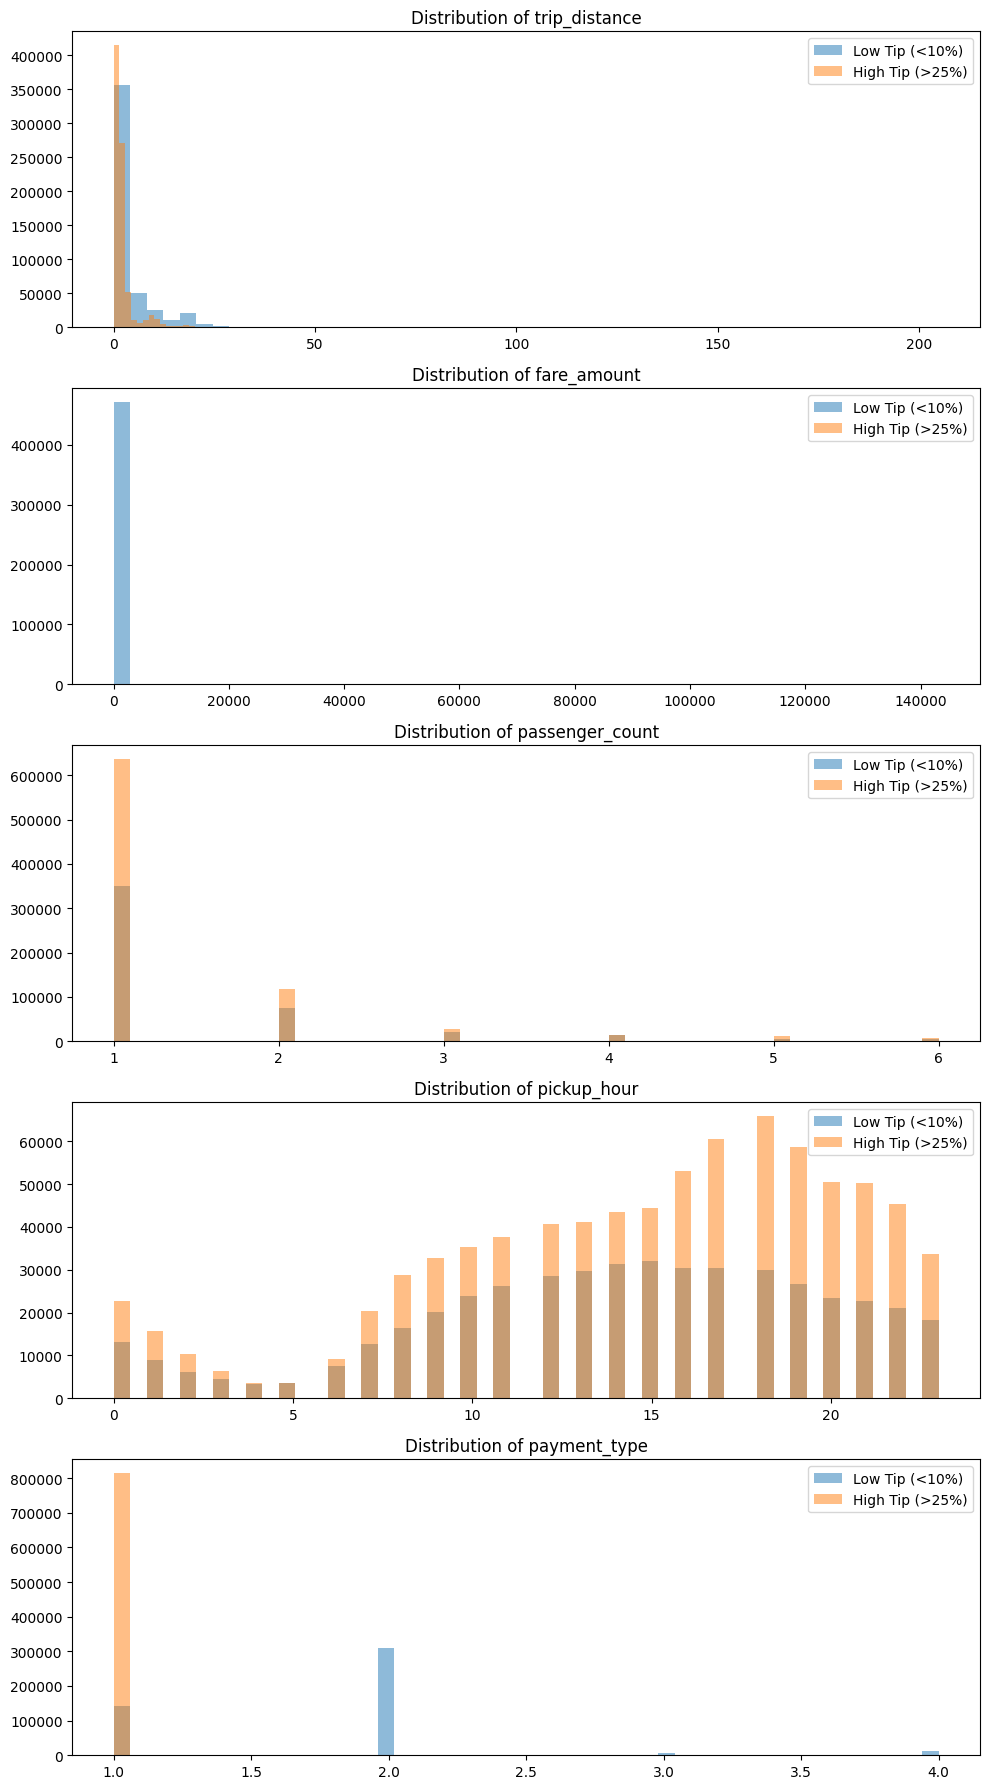

In [130]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tip = valid[valid['tip_pct'] < 0.10]
high_tip = valid[valid['tip_pct'] > 0.25]

# Compare summary statistics
print("Low tip (<10%) summary:")
display(low_tip.describe(include='all'))

print("\nHigh tip (>25%) summary:")
display(high_tip.describe(include='all'))

# Compare distributions for key features
import matplotlib.pyplot as plt

features = ['trip_distance', 'fare_amount', 'passenger_count', 'pickup_hour', 'payment_type']
fig, axes = plt.subplots(len(features), 1, figsize=(10, 18))
for i, col in enumerate(features):
    axes[i].hist(low_tip[col], bins=50, alpha=0.5, label='Low Tip (<10%)')
    axes[i].hist(high_tip[col], bins=50, alpha=0.5, label='High Tip (>25%)')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend()
plt.tight_layout()
plt.show()



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

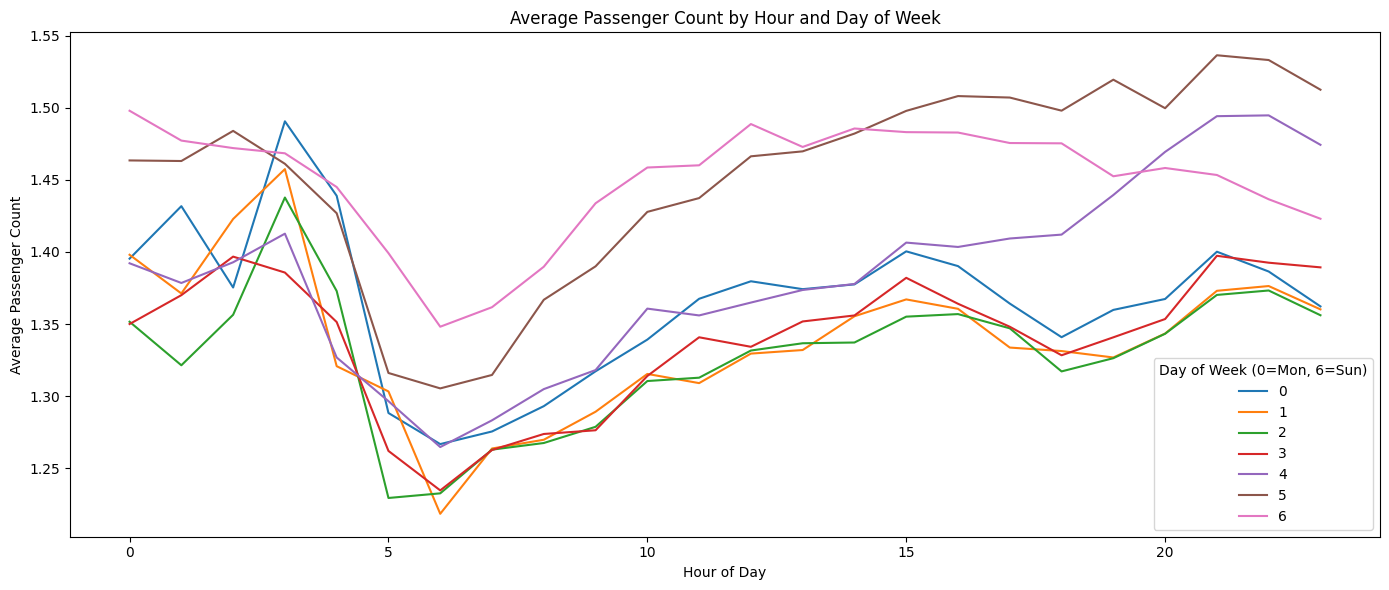

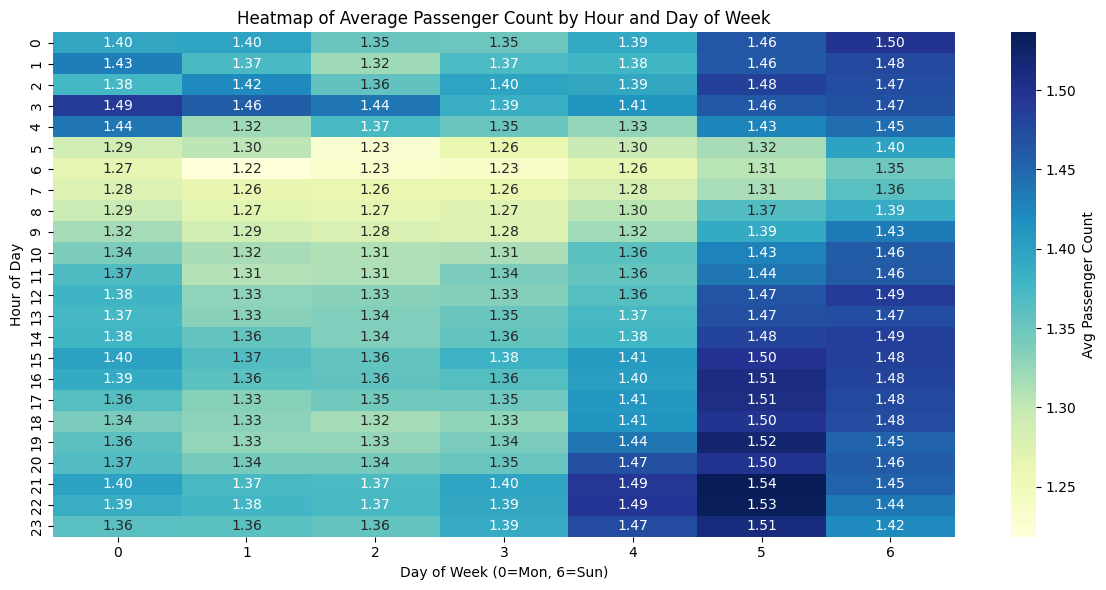

In [134]:
# See how passenger count varies across hours and days

# Group by pickup_hour and pickup_dayofweek, calculate mean passenger count
hour_day_passenger = valid.groupby(['pickup_hour', 'pickup_dayofweek'])['passenger_count'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=hour_day_passenger,
    x='pickup_hour',
    y='passenger_count',
    hue='pickup_dayofweek',
    palette='tab10'
)
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')
plt.title('Average Passenger Count by Hour and Day of Week')
plt.legend(title='Day of Week (0=Mon, 6=Sun)')
plt.tight_layout()
plt.show()

# Create a pivot table for a heatmap: rows=hour, columns=dayofweek, values=mean passenger count
pivot = hour_day_passenger.pivot(index='pickup_hour', columns='pickup_dayofweek', values='passenger_count')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Avg Passenger Count'})
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Hour of Day')
plt.title('Heatmap of Average Passenger Count by Hour and Day of Week')
plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

zone        borough  passenger_count
5             Arrochar/Fort Wadsworth  Staten Island         1.954545
187                          Red Hook       Brooklyn         1.838710
11                       Battery Park      Manhattan         1.744157
199  Saint Michaels Cemetery/Woodside         Queens         1.666667
57                       Country Club          Bronx         1.666667
170               Ocean Parkway South       Brooklyn         1.625000
65                 DUMBO/Vinegar Hill       Brooklyn         1.590498
32                 Brooklyn Navy Yard       Brooklyn         1.565217
186                   Randalls Island      Manhattan         1.550000
251                World Trade Center      Manhattan         1.544986

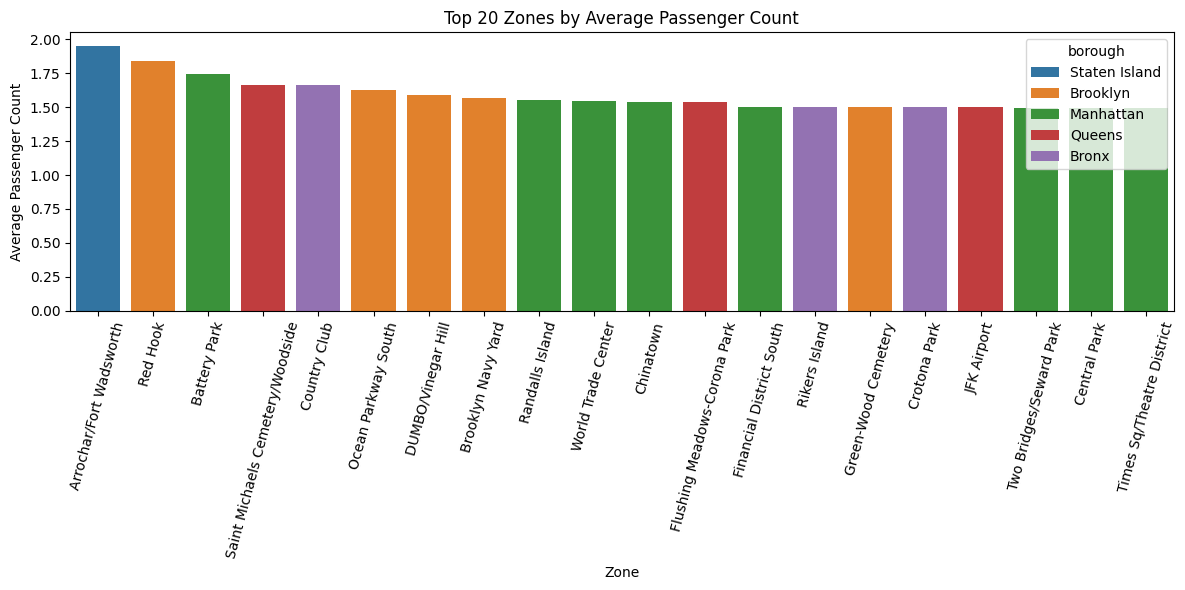

In [131]:
# How does passenger count vary across zones

# Group by pickup zone and calculate average passenger count
zone_passenger = valid.groupby('PULocationID')['passenger_count'].mean().reset_index()
zone_passenger = zone_passenger.merge(zones[['LocationID', 'zone', 'borough']], left_on='PULocationID', right_on='LocationID', how='left')

# Show top 10 zones with highest average passenger count
zone_passenger_sorted = zone_passenger.sort_values('passenger_count', ascending=False)
display(zone_passenger_sorted[['zone', 'borough', 'passenger_count']].head(10))

# Optional: Plot average passenger count by zone (top 20)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=zone_passenger_sorted.head(20),
    x='zone',
    y='passenger_count',
    hue='borough',
    dodge=False
)
plt.xticks(rotation=75)
plt.xlabel('Zone')
plt.ylabel('Average Passenger Count')
plt.title('Top 20 Zones by Average Passenger Count')
plt.tight_layout()
plt.show()



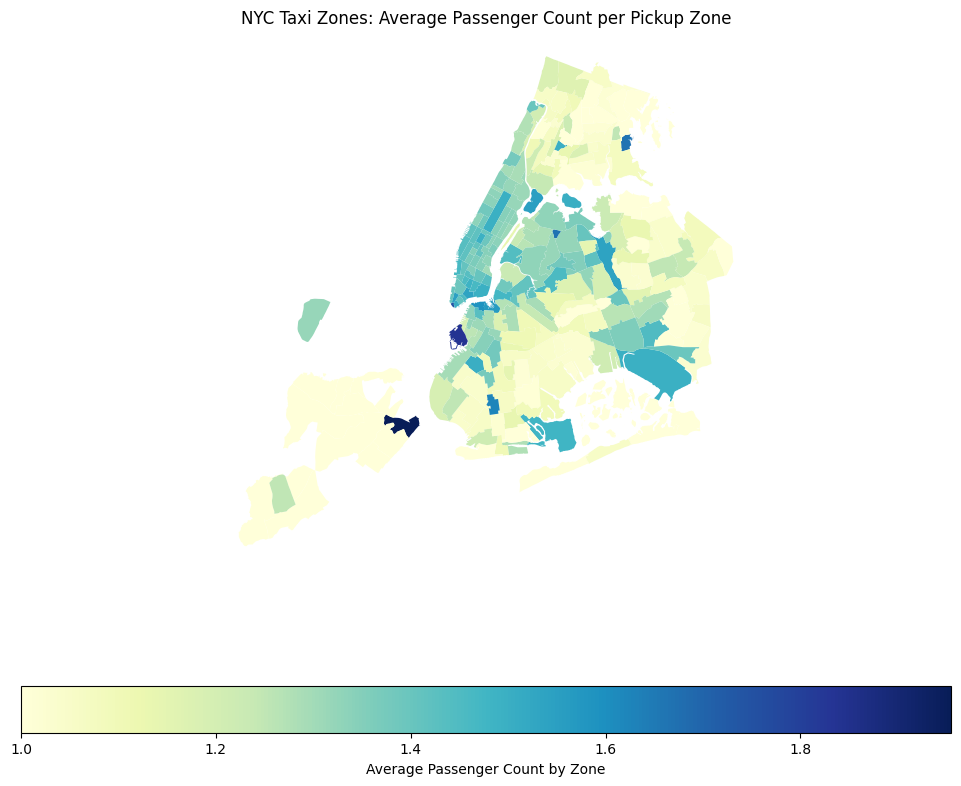

In [136]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_counts.plot(
    column='avg_passenger_count',
    ax=ax,
    cmap='YlGnBu',
    legend=True,
    legend_kwds={'label': "Average Passenger Count by Zone", 'orientation': "horizontal"}
)
ax.set_title('NYC Taxi Zones: Average Passenger Count per Pickup Zone')
ax.axis('off')
plt.show()



Find out how often surcharges/extra charges are applied to understand their prevalance

Extra charges are applied in the majority of taxi trips. In the dataset, the `extra` column represents additional charges such as night surcharges or rush hour fees. By analyzing the data, we find that:

- Only a small fraction of trips have `extra = 0`, indicating no extra charge.
- Most trips include some extra charge, with common values being $1.00 (rush hour), $0.50 (night surcharge), $3.50 or $6.00 (higher surcharges).

**Conclusion:**  
Extra charges are prevalent and form a regular part of taxi fares in NYC, reflecting the impact of time-based surcharges on most rides. This highlights the importance of these fees in overall fare calculations and revenue.

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [138]:
# How often is each surcharge applied?
extra_counts = valid['extra'].value_counts().sort_index()
extra_percent = (extra_counts / len(valid)) * 100

print("Surcharge value : Number of trips | Percentage of trips")
print(f"{'Surcharge':>10} | {'Trips':>10} | {'% of Trips':>10}")
print("-" * 36)
for value, count, pct in zip(extra_counts.index, extra_counts.values, extra_percent.values):
    print(f"${value:8.2f} | {count:10,d} | {pct:10.2f}%")



Surcharge value : Number of trips | Percentage of trips
 Surcharge |      Trips | % of Trips
------------------------------------
$    0.00 |    681,264 |      37.68%
$    0.01 |          1 |       0.00%
$    0.03 |          1 |       0.00%
$    0.19 |          1 |       0.00%
$    0.25 |          2 |       0.00%
$    0.50 |         18 |       0.00%
$    0.70 |          2 |       0.00%
$    0.75 |          5 |       0.00%
$    1.00 |    359,419 |      19.88%
$    1.05 |          1 |       0.00%
$    1.25 |      1,323 |       0.07%
$    1.50 |          7 |       0.00%
$    1.75 |      3,056 |       0.17%
$    2.25 |        867 |       0.05%
$    2.45 |          6 |       0.00%
$    2.50 |    461,261 |      25.51%
$    2.72 |          5 |       0.00%
$    2.75 |      2,135 |       0.12%
$    3.00 |         35 |       0.00%
$    3.05 |          2 |       0.00%
$    3.20 |         43 |       0.00%
$    3.25 |          7 |       0.00%
$    3.50 |    106,743 |       5.90%
$    3.75 |      2,

Top 10 Pickup Zones by Surcharge Frequency:


zone        borough  surcharge_rate
191              Rikers Island          Bronx        1.000000
179              Port Richmond  Staten Island        1.000000
58                Crotona Park          Bronx        1.000000
131          LaGuardia Airport         Queens        0.987752
245  Williamsburg (North Side)       Brooklyn        0.844350
69               East Elmhurst         Queens        0.839273
141            Lower East Side      Manhattan        0.833742
3                Alphabet City      Manhattan        0.821940
105                 Greenpoint       Brooklyn        0.810345
107    Greenwich Village South      Manhattan        0.796038

Top 10 Dropoff Zones by Surcharge Frequency:


zone   borough  surcharge_rate
134        LaGuardia Airport    Queens        0.981915
80         East Williamsburg  Brooklyn        0.823763
169             North Corona    Queens        0.819945
39           Carroll Gardens  Brooklyn        0.815706
51               Cobble Hill  Brooklyn        0.806533
14   Bay Terrace/Fort Totten    Queens        0.806122
108               Greenpoint  Brooklyn        0.803412
185         Prospect Heights  Brooklyn        0.802253
48              Clinton Hill  Brooklyn        0.800940
177               Park Slope  Brooklyn        0.800127

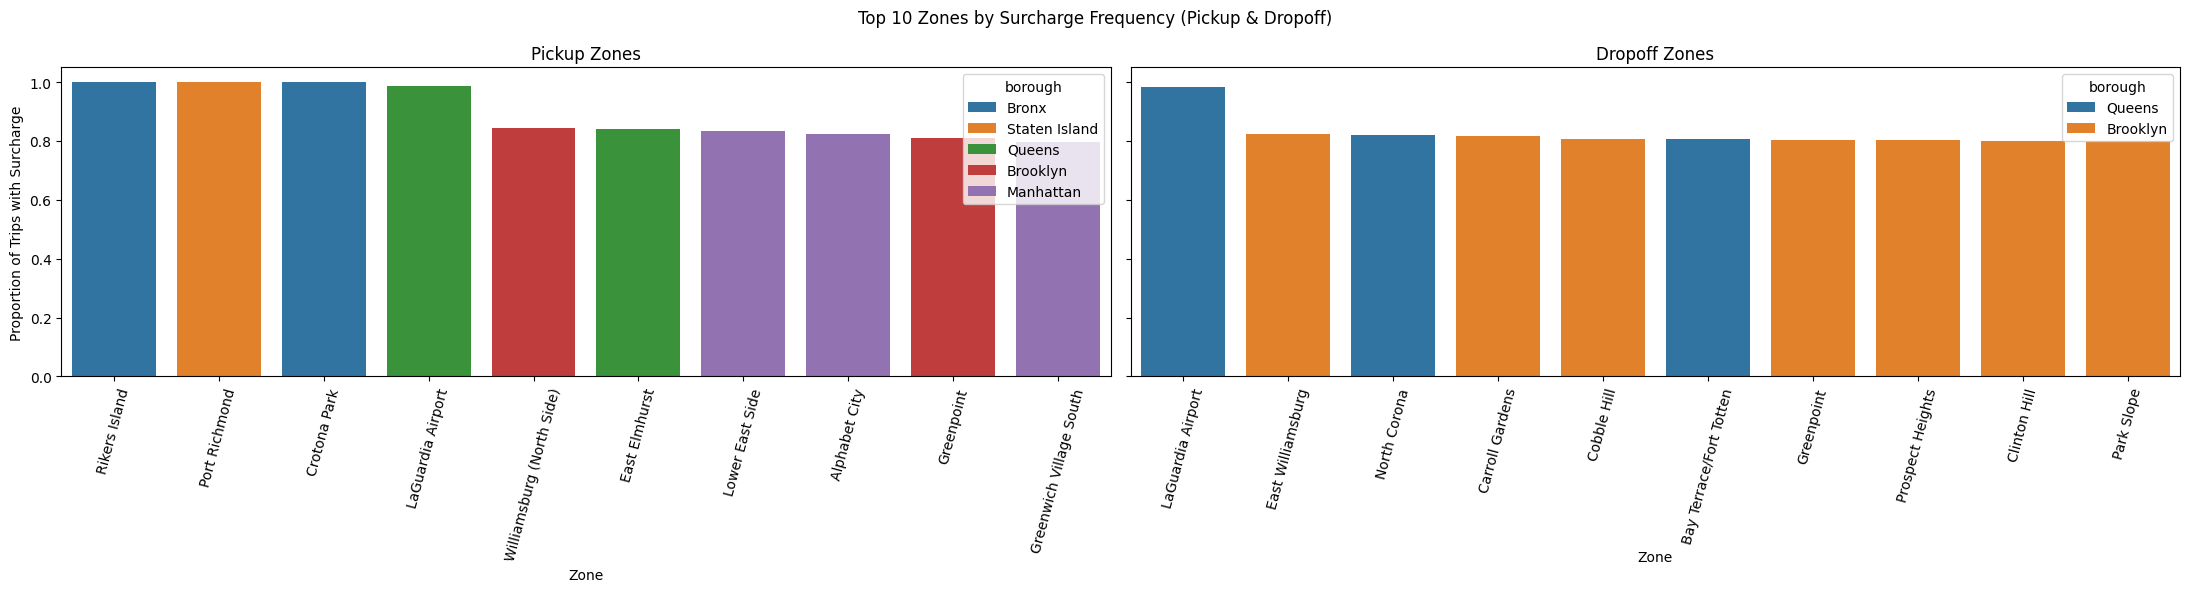

In [139]:
# Analyze pickup and dropoff zones where surcharges (extra > 0) are applied more frequently

# Pickup zones
surcharge_pickup = (
    valid.assign(has_surcharge=valid['extra'] > 0)
    .groupby('PULocationID')['has_surcharge']
    .mean()
    .reset_index()
    .rename(columns={'has_surcharge': 'surcharge_rate'})
    .merge(zones[['LocationID', 'zone', 'borough']], left_on='PULocationID', right_on='LocationID', how='left')
)
top_surcharge_pickup = surcharge_pickup.sort_values('surcharge_rate', ascending=False).head(10)

# Dropoff zones
surcharge_dropoff = (
    valid.assign(has_surcharge=valid['extra'] > 0)
    .groupby('DOLocationID')['has_surcharge']
    .mean()
    .reset_index()
    .rename(columns={'has_surcharge': 'surcharge_rate'})
    .merge(zones[['LocationID', 'zone', 'borough']], left_on='DOLocationID', right_on='LocationID', how='left')
)
top_surcharge_dropoff = surcharge_dropoff.sort_values('surcharge_rate', ascending=False).head(10)

print("Top 10 Pickup Zones by Surcharge Frequency:")
display(top_surcharge_pickup[['zone', 'borough', 'surcharge_rate']])

print("Top 10 Dropoff Zones by Surcharge Frequency:")
display(top_surcharge_dropoff[['zone', 'borough', 'surcharge_rate']])

# Optional: Plot both
fig, axes = plt.subplots(1, 2, figsize=(22, 6), sharey=True)
sns.barplot(
    data=top_surcharge_pickup,
    x='zone', y='surcharge_rate', hue='borough', dodge=False, ax=axes[0]
)
axes[0].set_title('Pickup Zones')
axes[0].set_xlabel('Zone')
axes[0].set_ylabel('Proportion of Trips with Surcharge')
axes[0].tick_params(axis='x', rotation=75)

sns.barplot(
    data=top_surcharge_dropoff,
    x='zone', y='surcharge_rate', hue='borough', dodge=False, ax=axes[1]
)
axes[1].set_title('Dropoff Zones')
axes[1].set_xlabel('Zone')
axes[1].tick_params(axis='x', rotation=75)

plt.suptitle('Top 10 Zones by Surcharge Frequency (Pickup & Dropoff)')
plt.tight_layout()
plt.show()

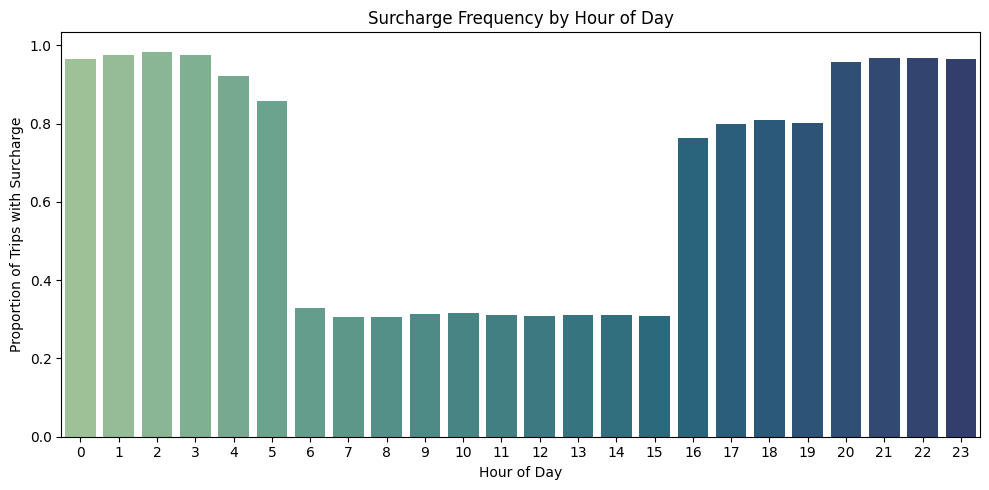

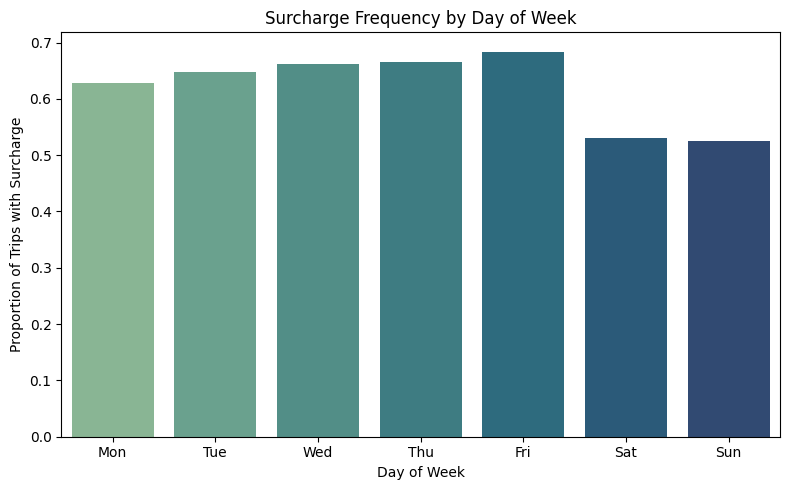

In [140]:
# Analyze at what times (hours of day, days of week) surcharges (extra > 0) are most frequently applied

# Proportion of trips with surcharge by hour of day
surcharge_by_hour = (
    valid.assign(has_surcharge=valid['extra'] > 0)
    .groupby('pickup_hour')['has_surcharge']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 5))
sns.barplot(x='pickup_hour', y='has_surcharge', data=surcharge_by_hour, palette="crest")
plt.xlabel('Hour of Day')
plt.ylabel('Proportion of Trips with Surcharge')
plt.title('Surcharge Frequency by Hour of Day')
plt.tight_layout()
plt.show()

# Proportion of trips with surcharge by day of week
surcharge_by_day = (
    valid.assign(has_surcharge=valid['extra'] > 0)
    .groupby('pickup_dayofweek')['has_surcharge']
    .mean()
    .reset_index()
)
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
surcharge_by_day['day_name'] = surcharge_by_day['pickup_dayofweek'].map(dict(enumerate(day_names)))

plt.figure(figsize=(8, 5))
sns.barplot(x='day_name', y='has_surcharge', data=surcharge_by_day, palette="crest")
plt.xlabel('Day of Week')
plt.ylabel('Proportion of Trips with Surcharge')
plt.title('Surcharge Frequency by Day of Week')
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

# Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Based on our analysis, here are some practical recommendations:

- **Increase cab availability during peak hours (6 AM–10 PM)** to meet high demand and reduce passenger wait times.
- **Apply surge pricing in high-demand zones and peak periods** to balance supply and demand, ensuring drivers are incentivized to serve busy areas.
- **Adjust pricing dynamically by hour and day of the week**—fares can be higher during busy times and lower during quieter periods, making the system fairer for both drivers and riders.
- **Boost night-time coverage (11 PM–5 AM) in zones with high late-night activity** to improve safety and service for night travelers.
- **Use smart repositioning algorithms** so cabs are proactively moved to areas where demand is expected to surge, reducing idle time and improving efficiency.

These steps will help create a more responsive, efficient, and customer-friendly taxi service for NYC.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

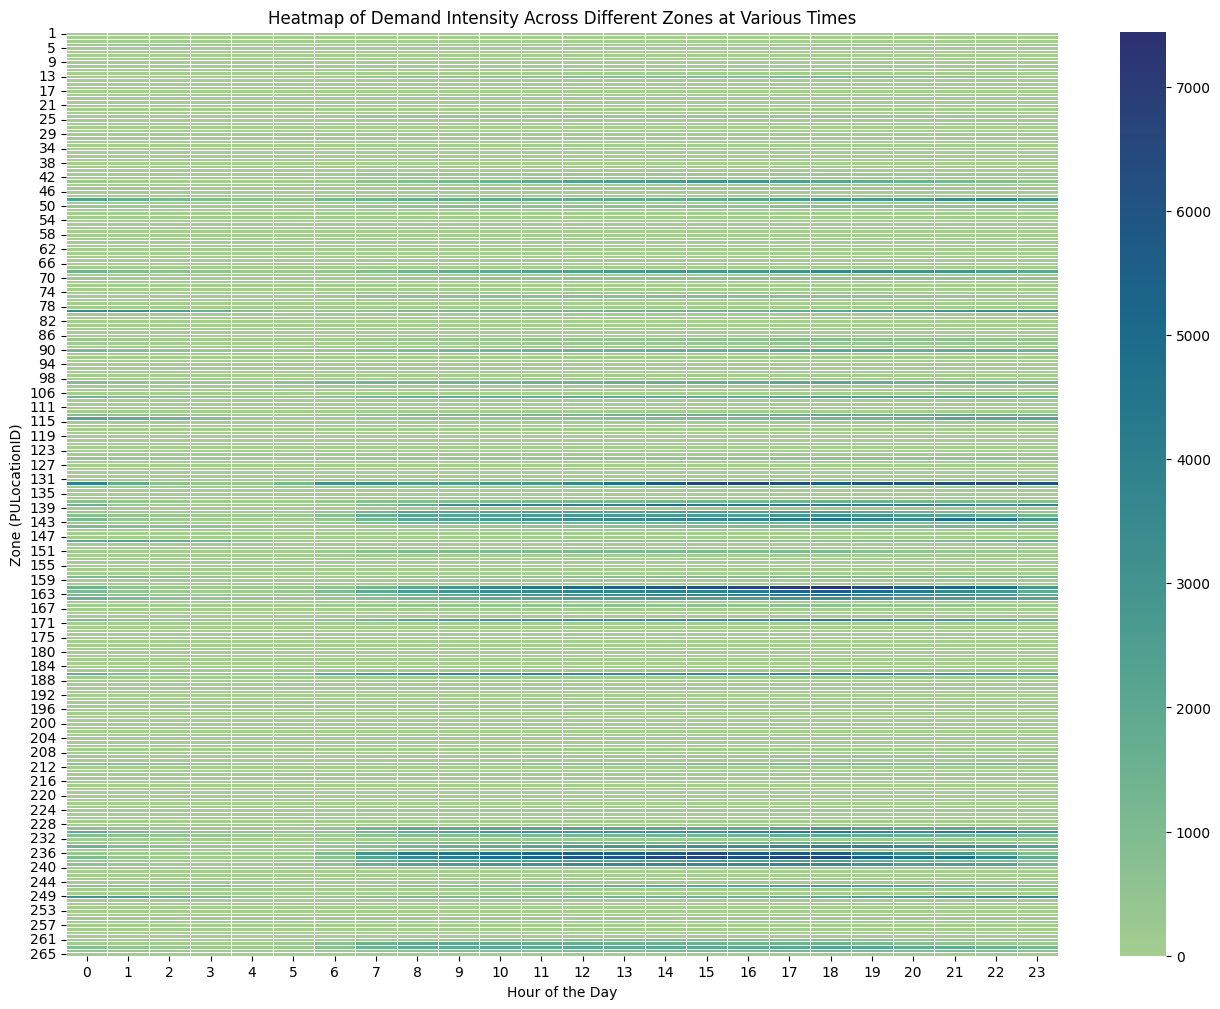


**Suggestions for Strategic Cab Positioning:**

- Deploy more cabs in zones and hours with consistently high demand (darker regions in the heatmap).
- Monitor zones with sharp demand spikes at specific hours and pre-position cabs before peak times.
- During late-night and early-morning hours, focus resources on zones with notable demand to ensure coverage and safety.
- Use historical demand patterns to create dynamic shift schedules for drivers, aligning supply with expected demand.
- Consider reducing idle cabs in zones and hours with persistently low demand, reallocating them to busier areas.



In [ ]:
# Calculate trip counts by zone and hour
trip_counts = df_zones_merged.groupby(['PULocationID', 'pickup_hour']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(trip_counts, cmap="crest", linewidths=0.5)
plt.title('Heatmap of Demand Intensity Across Different Zones at Various Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Zone (PULocationID)')
plt.show()

# Suggestions based on the heatmap:

**Suggestions for Strategic Cab Positioning:**

- Deploy more cabs in zones and hours with consistently high demand (darker regions in the heatmap).
- Monitor zones with sharp demand spikes at specific hours and pre-position cabs before peak times.
- During late-night and early-morning hours, focus resources on zones with notable demand to ensure coverage and safety.
- Use historical demand patterns to create dynamic shift schedules for drivers, aligning supply with expected demand.
- Consider reducing idle cabs in zones and hours with persistently low demand, reallocating them to busier areas.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.


# Data-driven recommendations for pricing strategy (expanded and summarized)



## Data-Driven Pricing Strategy Recommendations

Based on the analysis of NYC taxi data, here are actionable recommendations to maximize revenue while staying competitive:

1. **Seasonal Pricing Adjustments:**  
    - Revenue dips in July, August, and September. To boost demand during these months, offer competitive fares or targeted discounts compared to other vendors. This can help attract more riders and increase overall revenue in off-peak months.

2. **Dynamic Surcharges and Waiting Charges:**  
    - The correlation between trip duration and fare amount is relatively low (0.32), indicating that longer trips (in time) do not always result in higher fares. Introducing or increasing waiting charges for idle time (e.g., traffic jams, stops) can better align fares with actual service time, making pricing fairer and increasing revenue.

3. **Passenger-Based Fare Structuring:**  
    - Analysis shows that fare per mile per passenger decreases as the number of passengers increases. Consider implementing a modest additional fee for extra passengers, or offering group discounts during low-demand periods to optimize vehicle utilization and revenue.

4. **Distance-Tiered Pricing:**  
    - Fare per mile is highest for short trips (≤2 miles) and decreases for longer trips. Maintain higher per-mile rates for short trips to cover fixed costs, but ensure longer trips remain attractive with competitive rates.

5. **Vendor Competition and Benchmarking:**  
    - Regularly compare fare structures with other vendors, especially for popular routes and distance tiers. Adjust pricing to remain competitive, particularly in high-demand zones and hours.

6. **Machine Learning for Demand Prediction:**  
    - Use predictive models to estimate demand elasticity by time, location, and trip characteristics. This enables precise, data-driven fare adjustments (e.g., surge pricing during peak hours or in busy zones) to maximize both occupancy and revenue.

7. **Transparent Communication:**  
    - Clearly communicate any surcharges, waiting charges, or dynamic pricing to customers. Transparency builds trust and reduces fare disputes.

By implementing these strategies, the company can optimize pricing, improve customer satisfaction, and maximize revenue throughout the year.
